In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
results = []
num_classes = 2
learning_rate = 0.005
samples = 3000
epsilon=0
#for epsilon in [0.1, 0.05, 0.025, 0.15]:
for batch_size in [256]:
    for hidden_size in [100]:
        for aux_loss_activated in [True]:
            for EPS1 in [0.005]:
                for n in [100000]:
                    for opt in [1]:
                        for t in range(1):
                            train_dataset, test_dataset = ut.load_files(dataset=1)
                            input_size = train_dataset.shape[1]-1
                            train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)
                            if n < 50000:
                                train_dataset = ut.down_sampling(train_dataset)
                                train_dataset = train_dataset.sample(n)
                                print(train_dataset)
                            else: 
                                trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                print('shape: ', trainig_dataset_a.shape[0])
                                n2 = n - trainig_dataset_a.shape[0]
                                print('clase no RR Lrae', n2)
                                trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                            


                            train_dataset = ut.sort_columns(train_dataset)
                            test_dataset = ut.sort_columns(test_dataset)
                            #train_dataset, test_dataset = ut.normalize(train_dataset, test_dataset)
                            test_dataset_pred = test_dataset.copy()
                            train_dataset_pred = train_dataset.copy()

                            try:
                                data_prior = ut.generate_samples_2D(samples, train_dataset, distribution='gaussian')
                                if train_dataset[train_dataset.label=='ClassB'].shape[0] >= samples:
                                    samples_prior = samples 
                                else: 
                                    samples_prior = train_dataset[train_dataset.label=='ClassB'].shape[0] 

                                data_prior = pd.concat([data_prior, train_dataset[train_dataset.label=='ClassB'].sample(samples_prior)])


                                train_dataset, test_dataset, data_prior = ut.normalize(train_dataset, test_dataset, data_prior)

                                train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2)

                                train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2)
                                print(train_dataset_prior.columns)
                                _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                net = Net(input_size, hidden_size, hidden_size, num_classes)
                                net.cuda()

                                hist_val, hist_train, hist_prior = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)
                            except Exception as error:
                                print(error)

    

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/franciscoperez/anacon

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28243
clase no RR Lrae 71757
           Amplitude      PeriodLS
Amplitude   0.015676      4.036500
PeriodLS    4.036500  10470.910945
           Amplitude       PeriodLS
Amplitude   0.001897      -2.121053
PeriodLS   -2.121053  353643.741253
(2991, 61)
(2991, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


{'fc1.weight': Parameter containing:
tensor([[-0.1216, -0.0253, -0.0620,  ..., -0.0635, -0.0172, -0.0142],
        [-0.0009,  0.0740,  0.0414,  ..., -0.0388,  0.0627, -0.0103],
        [-0.1228,  0.0421,  0.1236,  ..., -0.0735, -0.0756, -0.0063],
        ...,
        [-0.0505,  0.1162, -0.0782,  ..., -0.0003,  0.1011, -0.0680],
        [-0.0534,  0.1165,  0.0877,  ..., -0.0198,  0.0507, -0.0838],
        [-0.0666, -0.0228, -0.0282,  ..., -0.0681,  0.0579, -0.0940]],
       device='cuda:0', requires_grad=True), 'fc1.bias': Parameter containing:
tensor([-0.0407, -0.0272, -0.0856, -0.0314, -0.0396,  0.0784,  0.0362,  0.0466,
         0.0285, -0.0747, -0.0543, -0.0546, -0.0488,  0.0007,  0.1109, -0.0015,
        -0.0817, -0.0724,  0.0120, -0.1037, -0.0560, -0.0083, -0.0313,  0.0688,
        -0.1168,  0.0401, -0.0505,  0.0337, -0.0443, -0.0740,  0.0815, -0.0001,
        -0.0540, -0.0436,  0.1025,  0.0155, -0.1064,  0.1092,  0.0476, -0.0823,
        -0.1178,  0.1217,  0.1129, -0.0823, -0.102

training: epoch:  1  loss:  105.73602995276451 -- aux loss:  11.976548612117767
training: epoch:  2  loss:  100.6418978869915 -- aux loss:  13.142511010169983
training: epoch:  3  loss:  100.32421791553497 -- aux loss:  19.393175542354584
training: epoch:  4  loss:  100.12671014666557 -- aux loss:  11.640459716320038
training: epoch:  5  loss:  99.90355053544044 -- aux loss:  13.59038108587265
training: epoch:  6  loss:  99.82780438661575 -- aux loss:  11.696066975593567
training: epoch:  7  loss:  99.79771068692207 -- aux loss:  12.921666383743286
training: epoch:  8  loss:  99.76561105251312 -- aux loss:  11.308066308498383
training: epoch:  9  loss:  99.6432443857193 -- aux loss:  11.509606778621674
training: epoch:  10  loss:  99.65680414438248 -- aux loss:  11.752730011940002
the_last_loss:  0.0
running_loss_val:  0.6033998131752014
validating: epoch:  10  loss:  0.6033998131752014
The current loss: 0.6033998131752014
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(578

training: epoch:  67  loss:  98.87491220235825 -- aux loss:  11.85959780216217
training: epoch:  68  loss:  98.86925658583641 -- aux loss:  11.821642518043518
training: epoch:  69  loss:  98.8439826965332 -- aux loss:  11.255277752876282
training: epoch:  70  loss:  98.81967368721962 -- aux loss:  10.903281569480896
the_last_loss:  0.5767243504524231
running_loss_val:  0.5140133500099182
validating: epoch:  70  loss:  0.5140133500099182
The current loss: 0.5140133500099182
the_last_loss: 0.5767243504524231
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  71  loss:  98.92627507448196 -- aux loss:  11.185481071472168
training: epoch:  72  loss:  98.80346405506134 -- aux loss:  11.010269105434418
training: epoch: 

training: epoch:  131  loss:  98.62883219122887 -- aux loss:  12.191572189331055
training: epoch:  132  loss:  98.64586007595062 -- aux loss:  11.086890816688538
training: epoch:  133  loss:  98.64822107553482 -- aux loss:  10.987907528877258
training: epoch:  134  loss:  98.64075031876564 -- aux loss:  11.935276627540588
training: epoch:  135  loss:  98.61351630091667 -- aux loss:  11.156410217285156
training: epoch:  136  loss:  98.7128534913063 -- aux loss:  10.821923673152924
training: epoch:  137  loss:  98.61133882403374 -- aux loss:  10.814745008945465
training: epoch:  138  loss:  98.59624055027962 -- aux loss:  10.889171063899994
training: epoch:  139  loss:  98.57524991035461 -- aux loss:  10.830995082855225
training: epoch:  140  loss:  98.6184096634388 -- aux loss:  10.94108670949936
the_last_loss:  0.6187006235122681
running_loss_val:  0.5532621741294861
validating: epoch:  140  loss:  0.5532621741294861
The current loss: 0.5532621741294861
the_last_loss: 0.618700623512268

training: epoch:  195  loss:  98.50378569960594 -- aux loss:  10.672055184841156
training: epoch:  196  loss:  98.49017387628555 -- aux loss:  10.67094475030899
training: epoch:  197  loss:  98.47742575407028 -- aux loss:  11.057137131690979
training: epoch:  198  loss:  98.58313828706741 -- aux loss:  10.902700066566467
training: epoch:  199  loss:  98.48827204108238 -- aux loss:  10.977250695228577
training: epoch:  200  loss:  98.46169477701187 -- aux loss:  10.734930098056793
the_last_loss:  0.5361294746398926
running_loss_val:  0.5646901726722717
validating: epoch:  200  loss:  0.5646901726722717
The current loss: 0.5646901726722717
the_last_loss: 0.5361294746398926
trigger times: 1
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training:

training: epoch:  259  loss:  98.40004748106003 -- aux loss:  11.139671087265015
training: epoch:  260  loss:  98.42982438206673 -- aux loss:  10.757337212562561
the_last_loss:  0.5668652653694153
running_loss_val:  0.5932621955871582
validating: epoch:  260  loss:  0.5932621955871582
The current loss: 0.5932621955871582
the_last_loss: 0.5668652653694153
trigger times: 1
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  261  loss:  98.43104475736618 -- aux loss:  10.944379210472107
training: epoch:  262  loss:  98.40453597903252 -- aux loss:  10.737305581569672
training: epoch:  263  loss:  98.39747467637062 -- aux loss:  10.82972401380539
training: epoch:  264  loss:  98.51478406786919 -- aux loss:  10.988576531410217
training:

training: epoch:  321  loss:  98.34530493617058 -- aux loss:  10.689624011516571
training: epoch:  322  loss:  98.41475117206573 -- aux loss:  10.70820564031601
training: epoch:  323  loss:  98.4023819565773 -- aux loss:  10.802063584327698
training: epoch:  324  loss:  98.42911231517792 -- aux loss:  10.79781585931778
training: epoch:  325  loss:  98.3986347913742 -- aux loss:  10.788456201553345
training: epoch:  326  loss:  98.37127208709717 -- aux loss:  10.901516377925873
training: epoch:  327  loss:  98.36130601167679 -- aux loss:  10.78849047422409
training: epoch:  328  loss:  98.43236964941025 -- aux loss:  11.054965376853943
training: epoch:  329  loss:  98.3575709760189 -- aux loss:  10.835911929607391
training: epoch:  330  loss:  98.40003153681755 -- aux loss:  11.08755648136139
the_last_loss:  0.5904490947723389
running_loss_val:  0.6504049301147461
validating: epoch:  330  loss:  0.6504049301147461
The current loss: 0.6504049301147461
the_last_loss: 0.5904490947723389
tr

training: epoch:  385  loss:  98.36683908104897 -- aux loss:  10.741403460502625
training: epoch:  386  loss:  98.34752660989761 -- aux loss:  10.710792064666748
training: epoch:  387  loss:  98.35648021101952 -- aux loss:  11.564107537269592
training: epoch:  388  loss:  98.35926088690758 -- aux loss:  10.748144745826721
training: epoch:  389  loss:  98.3619459271431 -- aux loss:  10.93813145160675
training: epoch:  390  loss:  98.38893294334412 -- aux loss:  10.74271959066391
the_last_loss:  0.6011494994163513
running_loss_val:  0.546373188495636
validating: epoch:  390  loss:  0.546373188495636
The current loss: 0.546373188495636
the_last_loss: 0.6011494994163513
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoc

training: epoch:  450  loss:  98.34137499332428 -- aux loss:  10.67907339334488
the_last_loss:  0.6275472640991211
running_loss_val:  0.48469027876853943
validating: epoch:  450  loss:  0.48469027876853943
The current loss: 0.48469027876853943
the_last_loss: 0.6275472640991211
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  451  loss:  98.35450321435928 -- aux loss:  10.688692510128021
training: epoch:  452  loss:  98.33077350258827 -- aux loss:  10.690889418125153
training: epoch:  453  loss:  98.30688434839249 -- aux loss:  10.684865176677704
training: epoch:  454  loss:  98.3231129348278 -- aux loss:  10.709145903587341
training: epoch:  455  loss:  98.37048250436783 -- aux loss:  10.697666883468628
trainin

training: epoch:  511  loss:  98.31177017092705 -- aux loss:  10.712683379650116
training: epoch:  512  loss:  98.29938524961472 -- aux loss:  10.666994422674179
training: epoch:  513  loss:  98.30888149142265 -- aux loss:  10.68178129196167
training: epoch:  514  loss:  98.29219079017639 -- aux loss:  10.671386241912842
training: epoch:  515  loss:  98.30290895700455 -- aux loss:  10.691095381975174
training: epoch:  516  loss:  98.29876819252968 -- aux loss:  10.814318716526031
training: epoch:  517  loss:  98.36973586678505 -- aux loss:  10.78688770532608
training: epoch:  518  loss:  98.32191753387451 -- aux loss:  10.703542053699493
training: epoch:  519  loss:  98.31503921747208 -- aux loss:  10.698996305465698
training: epoch:  520  loss:  98.28720736503601 -- aux loss:  10.742564260959625
the_last_loss:  0.5932615399360657
running_loss_val:  0.5304043889045715
validating: epoch:  520  loss:  0.5304043889045715
The current loss: 0.5304043889045715
the_last_loss: 0.59326153993606

training: epoch:  575  loss:  98.29063931107521 -- aux loss:  10.724289536476135
training: epoch:  576  loss:  98.2860115468502 -- aux loss:  10.702522695064545
training: epoch:  577  loss:  98.33818471431732 -- aux loss:  10.680629968643188
training: epoch:  578  loss:  98.34144699573517 -- aux loss:  10.71449899673462
training: epoch:  579  loss:  98.29209724068642 -- aux loss:  10.708197176456451
training: epoch:  580  loss:  98.28178665041924 -- aux loss:  10.703971803188324
the_last_loss:  0.5989758372306824
running_loss_val:  0.6218329668045044
validating: epoch:  580  loss:  0.6218329668045044
The current loss: 0.6218329668045044
the_last_loss: 0.5989758372306824
trigger times: 2
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: 

training: epoch:  639  loss:  98.29258573055267 -- aux loss:  12.43022108078003
training: epoch:  640  loss:  98.28855648636818 -- aux loss:  11.101466178894043
the_last_loss:  0.5475472807884216
running_loss_val:  0.5018329620361328
validating: epoch:  640  loss:  0.5018329620361328
The current loss: 0.5018329620361328
the_last_loss: 0.5475472807884216
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  641  loss:  98.28351652622223 -- aux loss:  10.875845074653625
training: epoch:  642  loss:  98.27142572402954 -- aux loss:  10.676024198532104
training: epoch:  643  loss:  98.30471017956734 -- aux loss:  10.732027649879456
training: epoch:  644  loss:  98.27989292144775 -- aux loss:  10.985752046108246
training:

training: epoch:  701  loss:  98.32351216673851 -- aux loss:  10.652827441692352
training: epoch:  702  loss:  98.29790133237839 -- aux loss:  11.753348767757416
training: epoch:  703  loss:  98.31425818800926 -- aux loss:  10.874744832515717
training: epoch:  704  loss:  98.28294950723648 -- aux loss:  10.655069768428802
training: epoch:  705  loss:  98.26282119750977 -- aux loss:  10.682528376579285
training: epoch:  706  loss:  98.26641416549683 -- aux loss:  10.887341141700745
training: epoch:  707  loss:  98.27675560116768 -- aux loss:  10.642217338085175
training: epoch:  708  loss:  98.29454180598259 -- aux loss:  10.652721047401428
training: epoch:  709  loss:  98.25716617703438 -- aux loss:  10.635764002799988
training: epoch:  710  loss:  98.25251987576485 -- aux loss:  10.658775508403778
the_last_loss:  0.564690113067627
running_loss_val:  0.5989758372306824
validating: epoch:  710  loss:  0.5989758372306824
The current loss: 0.5989758372306824
the_last_loss: 0.5646901130676

training: epoch:  765  loss:  98.26077830791473 -- aux loss:  10.648215115070343
training: epoch:  766  loss:  98.26786369085312 -- aux loss:  10.734981179237366
training: epoch:  767  loss:  98.25934499502182 -- aux loss:  10.650576055049896
training: epoch:  768  loss:  98.26159593462944 -- aux loss:  10.798744142055511
training: epoch:  769  loss:  98.26578861474991 -- aux loss:  10.65402615070343
training: epoch:  770  loss:  98.32811304926872 -- aux loss:  10.663115799427032
the_last_loss:  0.5704044103622437
running_loss_val:  0.5304043889045715
validating: epoch:  770  loss:  0.5304043889045715
The current loss: 0.5304043889045715
the_last_loss: 0.5704044103622437
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training:

training: epoch:  830  loss:  98.27511641383171 -- aux loss:  10.723732352256775
the_last_loss:  0.5761187076568604
running_loss_val:  0.554495632648468
validating: epoch:  830  loss:  0.554495632648468
The current loss: 0.554495632648468
the_last_loss: 0.5761187076568604
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  831  loss:  98.26883551478386 -- aux loss:  10.675475299358368
training: epoch:  832  loss:  98.27392229437828 -- aux loss:  10.664640009403229
training: epoch:  833  loss:  98.26840931177139 -- aux loss:  10.680515110492706
training: epoch:  834  loss:  98.2572979927063 -- aux loss:  10.714820683002472
training: epoch:  835  loss:  98.25796830654144 -- aux loss:  10.681909084320068
training: ep

training: epoch:  891  loss:  98.28936442732811 -- aux loss:  10.861637711524963
training: epoch:  892  loss:  98.26274299621582 -- aux loss:  11.200206100940704
training: epoch:  893  loss:  98.24857726693153 -- aux loss:  10.77171903848648
training: epoch:  894  loss:  98.25277951359749 -- aux loss:  10.858275592327118
training: epoch:  895  loss:  98.2586221396923 -- aux loss:  10.75355350971222
training: epoch:  896  loss:  98.30731132626534 -- aux loss:  10.70956015586853
training: epoch:  897  loss:  98.27379447221756 -- aux loss:  10.669945001602173
training: epoch:  898  loss:  98.34798815846443 -- aux loss:  10.823481440544128
training: epoch:  899  loss:  98.28155308961868 -- aux loss:  10.779969930648804
training: epoch:  900  loss:  98.24370211362839 -- aux loss:  10.752773702144623
the_last_loss:  0.564690113067627
running_loss_val:  0.5704044103622437
validating: epoch:  900  loss:  0.5704044103622437
The current loss: 0.5704044103622437
the_last_loss: 0.564690113067627
t

training: epoch:  955  loss:  98.24787205457687 -- aux loss:  12.579548120498657
training: epoch:  956  loss:  98.24670615792274 -- aux loss:  11.99939376115799
training: epoch:  957  loss:  98.29178810119629 -- aux loss:  12.281220614910126
training: epoch:  958  loss:  98.26161742210388 -- aux loss:  12.006094813346863
training: epoch:  959  loss:  98.23867735266685 -- aux loss:  11.841350317001343
training: epoch:  960  loss:  98.26575344800949 -- aux loss:  13.074897646903992
the_last_loss:  0.6831964254379272
running_loss_val:  0.6345568299293518
validating: epoch:  960  loss:  0.6345568299293518
The current loss: 0.6345568299293518
the_last_loss: 0.6831964254379272
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training:

training: epoch:  1019  loss:  98.26511353254318 -- aux loss:  10.772822797298431
training: epoch:  1020  loss:  98.28432422876358 -- aux loss:  10.700870037078857
the_last_loss:  0.5989758372306824
running_loss_val:  0.587547242641449
validating: epoch:  1020  loss:  0.587547242641449
The current loss: 0.587547242641449
the_last_loss: 0.5989758372306824
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  1021  loss:  98.27138099074364 -- aux loss:  10.719601154327393
training: epoch:  1022  loss:  98.27089807391167 -- aux loss:  10.735975086688995
training: epoch:  1023  loss:  98.25863194465637 -- aux loss:  10.857269585132599
training: epoch:  1024  loss:  98.28070485591888 -- aux loss:  10.791693389415741
trai

training: epoch:  1081  loss:  98.24689635634422 -- aux loss:  10.678277790546417
training: epoch:  1082  loss:  98.28151541948318 -- aux loss:  10.667234539985657
training: epoch:  1083  loss:  98.24812269210815 -- aux loss:  10.652998268604279
training: epoch:  1084  loss:  98.25029119849205 -- aux loss:  10.651466250419617
training: epoch:  1085  loss:  98.25471365451813 -- aux loss:  10.662554800510406
training: epoch:  1086  loss:  98.25968852639198 -- aux loss:  10.667248725891113
training: epoch:  1087  loss:  98.2478699684143 -- aux loss:  10.702012360095978
training: epoch:  1088  loss:  98.25773745775223 -- aux loss:  10.687882244586945
training: epoch:  1089  loss:  98.2543118596077 -- aux loss:  10.716868996620178
training: epoch:  1090  loss:  98.27455326914787 -- aux loss:  10.67888855934143
the_last_loss:  0.5989758372306824
running_loss_val:  0.5761187076568604
validating: epoch:  1090  loss:  0.5761187076568604
The current loss: 0.5761187076568604
the_last_loss: 0.5989

training: epoch:  1145  loss:  98.25969952344894 -- aux loss:  10.693106174468994
training: epoch:  1146  loss:  98.27619937062263 -- aux loss:  10.695135772228241
training: epoch:  1147  loss:  98.23086121678352 -- aux loss:  10.704038888216019
training: epoch:  1148  loss:  98.25191941857338 -- aux loss:  10.724405288696289
training: epoch:  1149  loss:  98.24862331151962 -- aux loss:  10.862773299217224
training: epoch:  1150  loss:  98.2715251147747 -- aux loss:  11.871564149856567
the_last_loss:  0.5247040390968323
running_loss_val:  0.6377304196357727
validating: epoch:  1150  loss:  0.6377304196357727
The current loss: 0.6377304196357727
the_last_loss: 0.5247040390968323
trigger times: 1
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
tr

training: epoch:  1209  loss:  98.29094797372818 -- aux loss:  10.847770094871521
training: epoch:  1210  loss:  98.24374097585678 -- aux loss:  10.6583212018013
the_last_loss:  0.610404372215271
running_loss_val:  0.5932615399360657
validating: epoch:  1210  loss:  0.5932615399360657
The current loss: 0.5932615399360657
the_last_loss: 0.610404372215271
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  1211  loss:  98.24812653660774 -- aux loss:  10.705545008182526
training: epoch:  1212  loss:  98.24694162607193 -- aux loss:  10.662424743175507
training: epoch:  1213  loss:  98.24161624908447 -- aux loss:  10.685386300086975
training: epoch:  1214  loss:  98.2497133910656 -- aux loss:  10.693521082401276
traini

training: epoch:  1271  loss:  98.2455322444439 -- aux loss:  10.651365041732788
training: epoch:  1272  loss:  98.2540785074234 -- aux loss:  10.658252596855164
training: epoch:  1273  loss:  98.23633655905724 -- aux loss:  10.649448871612549
training: epoch:  1274  loss:  98.24343910813332 -- aux loss:  10.65762460231781
training: epoch:  1275  loss:  98.27199682593346 -- aux loss:  10.656168818473816
training: epoch:  1276  loss:  98.24319192767143 -- aux loss:  10.646636724472046
training: epoch:  1277  loss:  98.26115822792053 -- aux loss:  10.654790997505188
training: epoch:  1278  loss:  98.23737514019012 -- aux loss:  10.70112144947052
training: epoch:  1279  loss:  98.24076819419861 -- aux loss:  10.651291012763977
training: epoch:  1280  loss:  98.23353523015976 -- aux loss:  10.64270967245102
the_last_loss:  0.5589758157730103
running_loss_val:  0.5704044103622437
validating: epoch:  1280  loss:  0.5704044103622437
The current loss: 0.5704044103622437
the_last_loss: 0.558975

training: epoch:  1335  loss:  98.26019820570946 -- aux loss:  10.649575769901276
training: epoch:  1336  loss:  98.24562278389931 -- aux loss:  10.652192175388336
training: epoch:  1337  loss:  98.26767584681511 -- aux loss:  10.643196880817413
training: epoch:  1338  loss:  98.24978095293045 -- aux loss:  10.6607346534729
training: epoch:  1339  loss:  98.26590439677238 -- aux loss:  10.658617794513702
training: epoch:  1340  loss:  98.23932164907455 -- aux loss:  10.634288370609283
the_last_loss:  0.587547242641449
running_loss_val:  0.564690113067627
validating: epoch:  1340  loss:  0.564690113067627
The current loss: 0.564690113067627
the_last_loss: 0.587547242641449
trigger times: 0
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training

training: epoch:  1399  loss:  98.24414652585983 -- aux loss:  10.688279330730438
training: epoch:  1400  loss:  98.25053760409355 -- aux loss:  10.7080819606781
the_last_loss:  0.5246900916099548
running_loss_val:  0.5304043889045715
validating: epoch:  1400  loss:  0.5304043889045715
The current loss: 0.5304043889045715
the_last_loss: 0.5246900916099548
trigger times: 2
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
training: epoch:  1401  loss:  98.2493008673191 -- aux loss:  10.793300092220306
training: epoch:  1402  loss:  98.29185822606087 -- aux loss:  10.7177854180336
training: epoch:  1403  loss:  98.23117050528526 -- aux loss:  10.672941148281097
training: epoch:  1404  loss:  98.24439007043839 -- aux loss:  10.643304526805878
traini

training: epoch:  1461  loss:  98.247001349926 -- aux loss:  10.6483393907547
training: epoch:  1462  loss:  98.25282689929008 -- aux loss:  10.630468487739563
training: epoch:  1463  loss:  98.24283435940742 -- aux loss:  10.656442046165466
training: epoch:  1464  loss:  98.23078382015228 -- aux loss:  10.640572011470795
training: epoch:  1465  loss:  98.24095582962036 -- aux loss:  10.637959718704224
training: epoch:  1466  loss:  98.23544415831566 -- aux loss:  10.64083081483841
training: epoch:  1467  loss:  98.23045638203621 -- aux loss:  10.66395092010498
training: epoch:  1468  loss:  98.24435338377953 -- aux loss:  10.64708560705185
training: epoch:  1469  loss:  98.23759531974792 -- aux loss:  10.667292177677155
training: epoch:  1470  loss:  98.26823061704636 -- aux loss:  11.834043085575104
the_last_loss:  0.5761187076568604
running_loss_val:  0.6480299830436707
validating: epoch:  1470  loss:  0.6480299830436707
The current loss: 0.6480299830436707
the_last_loss: 0.57611870

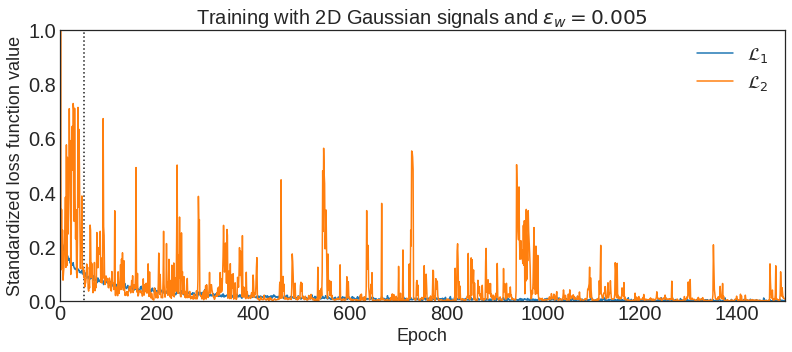

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pylab

fig = matplotlib.pyplot.gcf()
params = {'legend.fontsize': 20,
          'figure.figsize': (15, 5),
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)

fig.set_size_inches(13,5)
plt.style.use('seaborn-white')
plt.plot((hist_train-np.min(hist_train))/(np.max(hist_train)-np.min(hist_train)), label = '$\mathcal{L}_1$')
#plt.plot(hist_val/np.max(hist_val), label = 'Validation error')
plt.plot((hist_prior-np.min(hist_prior))/(np.max(hist_prior)-np.min(hist_prior)), label = '$\mathcal{L}_2$')
plt.ylabel('Standardized loss function value', fontsize = 18)
plt.xlabel('Epoch', fontsize = 18)
plt.vlines(x=50, ymin=-0.1, ymax=1, color='black',linestyles ="dotted", alpha=0.9)
plt.title('Training with 2D Gaussian signals and $\epsilon_w=0.005$', fontsize = 20, y = 1.0)
plt.ylim(0,1)
plt.xlim(-0.1,1500)
plt.legend(fontsize=18)
plt.savefig('gaussian2d-005-training.svg', format='svg', bbox_inches='tight')

In [3]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn


results = []
num_classes = 2

learning_rate = 0.005
samples = 3000

for epsilon in [0.2]:
    for batch_size in [256]:
        for hidden_size in [100]:
            for EPS1 in [0.025]:
                for n in [100000]:
                    for aux_loss_activated in [True]:
                        for opt in [2]:
                            for t in range(1):
                                train_dataset, test_dataset = ut.load_files(dataset=1)
                                input_size = train_dataset.shape[1]-1
                                print('before cleaning outliers')
                                print(train_dataset.shape)
                                print(test_dataset.shape)

                                train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)                                
                                print('after cleaning outliers')
                                print(train_dataset.shape)
                                print(test_dataset.shape)

                                if n < 50000:
                                    train_dataset = ut.down_sampling(train_dataset)
                                    train_dataset = train_dataset.sample(n)
                                    print(train_dataset)
                                else: 
                                    trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                    print('shape: ', trainig_dataset_a.shape[0])
                                    n2 = n - trainig_dataset_a.shape[0]
                                    print('clase no RR Lrae', n2)
                                    trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                    train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                                

                                train_dataset = ut.sort_columns(train_dataset)
                                test_dataset = ut.sort_columns(test_dataset)
                                #... normalize ...
                                
                                #print(train_dataset.columns)
                                test_dataset_pred = test_dataset.copy()
                                train_dataset_pred = train_dataset.copy()
                                try:
                                    data_prior = ut.generate_samples(samples, train_dataset, epsilon,  option = opt)

                                    if train_dataset[train_dataset.label=='ClassB'].shape[0] >= samples:
                                        samples_prior = samples 
                                    else: 
                                        samples_prior = train_dataset[train_dataset.label=='ClassB'].shape[0]
                                    
                                    data_prior = pd.concat([data_prior, train_dataset[train_dataset.label=='ClassB'].sample(samples_prior)])


                                    train_dataset, test_dataset, data_prior = ut.normalize(train_dataset, test_dataset, data_prior)
                                    print(data_prior)
                                    train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2)

                                    train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2)
                                    print(train_dataset_prior.columns)


                                    _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                    _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                    _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                    _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                    _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                    net = Net(input_size, hidden_size, hidden_size, num_classes)
                                    net.cuda()

                                    hist_val, hist_train, hist_prior = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                    EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)

                                except Exception as error:
                                    print(error) 
                                    print(str(epsilon)+"-"+str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
before cleaning outliers
(391501, 61)
(28625, 61)
after cleaning outliers
(373893, 61)
(27293, 61)
shape:  28243
clase no RR Lrae 71757
        PeriodLS  Amplitude  AndersonDarling  Autocor_length  Beyond1Std  \
0      -0.375634  -1.010838        -0.595817       -0.792620   -5.583695   
1      -0.375458  -1.010838        -0.595817       -0.792620   -5.583695   
2      -0.375328  -1.010838        -0.595817       -0.792620   -5.583695   
3      -0.375345  -1.010838        -0.595817       -0.792620   -5.583695   
4      -0.375381  -1.010838        -0.595817       -0.792620   -5.583695   
...          ...        ...              ...             ...         ...   
425485 -0.374518   0.443052        -0.595817        0.313301   -3.600598   
34819  -0.364666  -0.903426         0.369422        0.092117   -0.717359   
405931 -0.315054  -0.308828        -0.509764       -0.129068   -0.125015   
267833 -0.344285  -0

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  105.80596536397934 -- aux loss:  12.686187118291855
training: epoch:  2  loss:  100.68611744046211 -- aux loss:  15.547452211380005
training: epoch:  3  loss:  100.32237803936005 -- aux loss:  13.807037979364395
training: epoch:  4  loss:  100.08956053853035 -- aux loss:  13.050364673137665
training: epoch:  5  loss:  99.97420808672905 -- aux loss:  12.460671544075012
training: epoch:  6  loss:  99.85981667041779 -- aux loss:  11.58811929821968
training: epoch:  7  loss:  99.79833894968033 -- aux loss:  11.462292790412903
training: epoch:  8  loss:  99.7101494371891 -- aux loss:  9.799776166677475
training: epoch:  9  loss:  99.67047446966171 -- aux loss:  9.60381293296814
training: epoch:  10  loss:  99.60267043113708 -- aux loss:  9.673640996217728
the_last_loss:  0.0
running_loss_val:  0.3135303854942322
validating: epoch:  10  loss:  0.3135303854942322
The current loss: 0.3135303854942322
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(4856, 

training: epoch:  67  loss:  98.84170427918434 -- aux loss:  9.110043078660965
training: epoch:  68  loss:  98.7931480705738 -- aux loss:  9.10031533241272
training: epoch:  69  loss:  98.83882054686546 -- aux loss:  9.14678418636322
training: epoch:  70  loss:  98.79258853197098 -- aux loss:  9.110645860433578
the_last_loss:  0.31405380368232727
running_loss_val:  0.31394338607788086
validating: epoch:  70  loss:  0.31394338607788086
The current loss: 0.31394338607788086
the_last_loss: 0.31405380368232727
trigger times: 0
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  71  loss:  98.77435767650604 -- aux loss:  9.09963172674179
training: epoch:  72  loss:  98.80349487066269 -- aux loss:  9.085821509361267
training: epoch: 

training: epoch:  131  loss:  98.55403220653534 -- aux loss:  9.093409091234207
training: epoch:  132  loss:  98.58141699433327 -- aux loss:  9.157708019018173
training: epoch:  133  loss:  98.5898208618164 -- aux loss:  9.179971516132355
training: epoch:  134  loss:  98.60144376754761 -- aux loss:  9.161691755056381
training: epoch:  135  loss:  98.58732795715332 -- aux loss:  9.088546931743622
training: epoch:  136  loss:  98.57427954673767 -- aux loss:  9.088869333267212
training: epoch:  137  loss:  98.52837985754013 -- aux loss:  9.119988441467285
training: epoch:  138  loss:  98.52892643213272 -- aux loss:  9.275696605443954
training: epoch:  139  loss:  98.5679252743721 -- aux loss:  9.155561536550522
training: epoch:  140  loss:  98.62209311127663 -- aux loss:  9.129040122032166
the_last_loss:  0.31326162815093994
running_loss_val:  0.3132656514644623
validating: epoch:  140  loss:  0.3132656514644623
The current loss: 0.3132656514644623
the_last_loss: 0.31326162815093994
trigg

training: epoch:  196  loss:  98.48685199022293 -- aux loss:  9.134201347827911
training: epoch:  197  loss:  98.45077151060104 -- aux loss:  9.089114755392075
training: epoch:  198  loss:  98.45372673869133 -- aux loss:  9.102287650108337
training: epoch:  199  loss:  98.46855100989342 -- aux loss:  9.084799498319626
training: epoch:  200  loss:  98.50591260194778 -- aux loss:  9.096844285726547
the_last_loss:  0.3132624626159668
running_loss_val:  1.202150583267212
validating: epoch:  200  loss:  1.202150583267212
The current loss: 1.202150583267212
the_last_loss: 0.3132624626159668
trigger times: 1
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  201  loss:  98.4861673116684 -- aux loss:  9.127297908067703
training: epoch

training: epoch:  261  loss:  98.47497588396072 -- aux loss:  9.088566035032272
training: epoch:  262  loss:  98.45695671439171 -- aux loss:  9.092446267604828
training: epoch:  263  loss:  98.40912741422653 -- aux loss:  9.100353837013245
training: epoch:  264  loss:  98.41661295294762 -- aux loss:  9.088592439889908
training: epoch:  265  loss:  98.405782610178 -- aux loss:  9.084998577833176
training: epoch:  266  loss:  98.42583787441254 -- aux loss:  9.148191452026367
training: epoch:  267  loss:  98.46802681684494 -- aux loss:  9.109549522399902
training: epoch:  268  loss:  98.45265620946884 -- aux loss:  9.08458960056305
training: epoch:  269  loss:  98.42949366569519 -- aux loss:  9.107448816299438
training: epoch:  270  loss:  98.42797768115997 -- aux loss:  9.084609746932983
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326162815093994
validating: epoch:  270  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.31326162815093994
tri

training: epoch:  326  loss:  98.39319968223572 -- aux loss:  9.217833071947098
training: epoch:  327  loss:  98.38896557688713 -- aux loss:  9.08851534128189
training: epoch:  328  loss:  98.41831976175308 -- aux loss:  9.08636862039566
training: epoch:  329  loss:  98.43047371506691 -- aux loss:  9.314988523721695
training: epoch:  330  loss:  98.44274991750717 -- aux loss:  9.084587335586548
the_last_loss:  1.202150583267212
running_loss_val:  0.31326162815093994
validating: epoch:  330  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.202150583267212
trigger times: 0
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  331  loss:  98.40361946821213 -- aux loss:  9.084587395191193
training: ep

training: epoch:  391  loss:  98.43793070316315 -- aux loss:  9.092280983924866
training: epoch:  392  loss:  98.38696163892746 -- aux loss:  9.088512063026428
training: epoch:  393  loss:  98.38116905093193 -- aux loss:  9.084629625082016
training: epoch:  394  loss:  98.36657005548477 -- aux loss:  9.084649801254272
training: epoch:  395  loss:  98.400769084692 -- aux loss:  9.871640622615814
training: epoch:  396  loss:  98.4024441242218 -- aux loss:  9.145996868610382
training: epoch:  397  loss:  98.40774038434029 -- aux loss:  9.116346716880798
training: epoch:  398  loss:  98.36860373616219 -- aux loss:  9.950376331806183
training: epoch:  399  loss:  98.38824713230133 -- aux loss:  9.085010796785355
training: epoch:  400  loss:  98.39214584231377 -- aux loss:  9.212314426898956
the_last_loss:  1.0910394191741943
running_loss_val:  0.31326162815093994
validating: epoch:  400  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.0910394191741943
trigg

training: epoch:  456  loss:  98.37931603193283 -- aux loss:  9.088460385799408
training: epoch:  457  loss:  98.38680312037468 -- aux loss:  9.084609925746918
training: epoch:  458  loss:  98.39431634545326 -- aux loss:  9.49145421385765
training: epoch:  459  loss:  98.42623946070671 -- aux loss:  9.091364800930023
training: epoch:  460  loss:  98.38420706987381 -- aux loss:  9.084587216377258
the_last_loss:  0.5435424447059631
running_loss_val:  0.31326162815093994
validating: epoch:  460  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.5435424447059631
trigger times: 0
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  461  loss:  98.40890446305275 -- aux loss:  9.150728166103363
training:

training: epoch:  521  loss:  98.41792318224907 -- aux loss:  9.47961562871933
training: epoch:  522  loss:  98.38641169667244 -- aux loss:  9.084587216377258
training: epoch:  523  loss:  98.36486089229584 -- aux loss:  9.084587216377258
training: epoch:  524  loss:  98.39859473705292 -- aux loss:  9.088315606117249
training: epoch:  525  loss:  98.38341107964516 -- aux loss:  9.084587216377258
training: epoch:  526  loss:  98.39109626412392 -- aux loss:  9.08461019396782
training: epoch:  527  loss:  98.38492333889008 -- aux loss:  9.085779190063477
training: epoch:  528  loss:  98.3742795586586 -- aux loss:  9.40129441022873
training: epoch:  529  loss:  98.35041964054108 -- aux loss:  9.084587216377258
training: epoch:  530  loss:  98.34941092133522 -- aux loss:  9.08458760380745
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326162815093994
validating: epoch:  530  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.31326162815093994
trigg

training: epoch:  586  loss:  98.38621565699577 -- aux loss:  9.088501006364822
training: epoch:  587  loss:  98.4056202173233 -- aux loss:  9.084587216377258
training: epoch:  588  loss:  98.38029500842094 -- aux loss:  9.088493466377258
training: epoch:  589  loss:  98.40647011995316 -- aux loss:  9.08708342909813
training: epoch:  590  loss:  98.40670746564865 -- aux loss:  9.08458724617958
the_last_loss:  0.31326162815093994
running_loss_val:  0.48679986596107483
validating: epoch:  590  loss:  0.48679986596107483
The current loss: 0.48679986596107483
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  591  loss:  98.41095066070557 -- aux loss:  9.084587216377258
training:

training: epoch:  651  loss:  98.35647594928741 -- aux loss:  9.084587216377258
training: epoch:  652  loss:  98.40088838338852 -- aux loss:  9.089787900447845
training: epoch:  653  loss:  98.36029243469238 -- aux loss:  9.094986855983734
training: epoch:  654  loss:  98.39729326963425 -- aux loss:  9.088507682085037
training: epoch:  655  loss:  98.37573009729385 -- aux loss:  9.085296392440796
training: epoch:  656  loss:  98.36453545093536 -- aux loss:  9.092194944620132
training: epoch:  657  loss:  98.36051657795906 -- aux loss:  9.343054115772247
training: epoch:  658  loss:  98.37261071801186 -- aux loss:  9.099940717220306
training: epoch:  659  loss:  98.37514120340347 -- aux loss:  9.088494092226028
training: epoch:  660  loss:  98.3733948469162 -- aux loss:  9.086555033922195
the_last_loss:  1.202150583267212
running_loss_val:  0.7715927958488464
validating: epoch:  660  loss:  0.7715927958488464
The current loss: 0.7715927958488464
the_last_loss: 1.202150583267212
trigger 

training: epoch:  716  loss:  98.35733750462532 -- aux loss:  9.08746087551117
training: epoch:  717  loss:  98.42062368988991 -- aux loss:  9.084587305784225
training: epoch:  718  loss:  98.35821858048439 -- aux loss:  9.085701823234558
training: epoch:  719  loss:  98.36957237124443 -- aux loss:  9.156693994998932
training: epoch:  720  loss:  98.35314008593559 -- aux loss:  9.08864215016365
the_last_loss:  0.31326162815093994
running_loss_val:  0.31327641010284424
validating: epoch:  720  loss:  0.31327641010284424
The current loss: 0.31327641010284424
the_last_loss: 0.31326162815093994
trigger times: 2
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  721  loss:  98.35761958360672 -- aux loss:  9.10980162024498
training:

training: epoch:  781  loss:  98.34257790446281 -- aux loss:  9.084587216377258
training: epoch:  782  loss:  98.33854192495346 -- aux loss:  9.088493436574936
training: epoch:  783  loss:  98.35336434841156 -- aux loss:  9.08834719657898
training: epoch:  784  loss:  98.38385465741158 -- aux loss:  9.084587216377258
training: epoch:  785  loss:  98.33802393078804 -- aux loss:  9.084587305784225
training: epoch:  786  loss:  98.35054239630699 -- aux loss:  9.086071163415909
training: epoch:  787  loss:  98.35309234261513 -- aux loss:  9.085638254880905
training: epoch:  788  loss:  98.3339259326458 -- aux loss:  9.084819167852402
training: epoch:  789  loss:  98.3570297062397 -- aux loss:  9.088162451982498
training: epoch:  790  loss:  98.36917045712471 -- aux loss:  9.088493466377258
the_last_loss:  0.31326162815093994
running_loss_val:  1.202150583267212
validating: epoch:  790  loss:  1.202150583267212
The current loss: 1.202150583267212
the_last_loss: 0.31326162815093994
trigger t

training: epoch:  846  loss:  98.36169657111168 -- aux loss:  9.085527569055557
training: epoch:  847  loss:  98.33487710356712 -- aux loss:  9.084587514400482
training: epoch:  848  loss:  98.33007797598839 -- aux loss:  9.085191667079926
training: epoch:  849  loss:  98.35514241456985 -- aux loss:  9.088493764400482
training: epoch:  850  loss:  98.35601183772087 -- aux loss:  9.084587216377258
the_last_loss:  1.0910394191741943
running_loss_val:  1.202150583267212
validating: epoch:  850  loss:  1.202150583267212
The current loss: 1.202150583267212
the_last_loss: 1.0910394191741943
trigger times: 4
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  851  loss:  98.37021666765213 -- aux loss:  9.088489294052124
training: epoc

training: epoch:  911  loss:  98.34706225991249 -- aux loss:  9.089970737695694
training: epoch:  912  loss:  98.36584076285362 -- aux loss:  9.084594964981079
training: epoch:  913  loss:  98.35196137428284 -- aux loss:  9.088493466377258
training: epoch:  914  loss:  98.35627859830856 -- aux loss:  9.08462131023407
training: epoch:  915  loss:  98.32957011461258 -- aux loss:  9.084587216377258
training: epoch:  916  loss:  98.34677949547768 -- aux loss:  9.084587216377258
training: epoch:  917  loss:  98.36482793092728 -- aux loss:  9.084598243236542
training: epoch:  918  loss:  98.35178732872009 -- aux loss:  9.084587216377258
training: epoch:  919  loss:  98.35343950986862 -- aux loss:  9.08872401714325
training: epoch:  920  loss:  98.41359782218933 -- aux loss:  9.084587216377258
the_last_loss:  0.3132690191268921
running_loss_val:  0.6465948820114136
validating: epoch:  920  loss:  0.6465948820114136
The current loss: 0.6465948820114136
the_last_loss: 0.3132690191268921
trigger

training: epoch:  976  loss:  98.33147758245468 -- aux loss:  9.084587216377258
training: epoch:  977  loss:  98.3510919213295 -- aux loss:  9.089137107133865
training: epoch:  978  loss:  98.36978596448898 -- aux loss:  9.111326217651367
training: epoch:  979  loss:  98.34081643819809 -- aux loss:  9.086306035518646
training: epoch:  980  loss:  98.35177099704742 -- aux loss:  9.085410475730896
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326183676719666
validating: epoch:  980  loss:  0.31326183676719666
The current loss: 0.31326183676719666
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  981  loss:  98.36417749524117 -- aux loss:  9.72828009724617
training

training: epoch:  1040  loss:  98.35768806934357 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.4784385859966278
validating: epoch:  1040  loss:  0.4784385859966278
The current loss: 0.4784385859966278
the_last_loss: 0.31326162815093994
trigger times: 2
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  1041  loss:  98.34717178344727 -- aux loss:  9.084587216377258
training: epoch:  1042  loss:  98.34251934289932 -- aux loss:  9.08459746837616
training: epoch:  1043  loss:  98.3423083126545 -- aux loss:  9.085426777601242
training: epoch:  1044  loss:  98.3538769185543 -- aux loss:  9.084587216377258
training: epoch:  1045  loss:  98.34084531664848 -- aux loss:  9.309199094772339
train

training: epoch:  1101  loss:  98.33577966690063 -- aux loss:  9.084587216377258
training: epoch:  1102  loss:  98.3520065844059 -- aux loss:  9.084587216377258
training: epoch:  1103  loss:  98.33655887842178 -- aux loss:  9.085740715265274
training: epoch:  1104  loss:  98.3573048710823 -- aux loss:  9.089942395687103
training: epoch:  1105  loss:  98.34179642796516 -- aux loss:  9.084587216377258
training: epoch:  1106  loss:  98.33443972468376 -- aux loss:  9.084587216377258
training: epoch:  1107  loss:  98.37771806120872 -- aux loss:  9.088766127824783
training: epoch:  1108  loss:  98.33566689491272 -- aux loss:  9.097258269786835
training: epoch:  1109  loss:  98.34006676077843 -- aux loss:  9.084587216377258
training: epoch:  1110  loss:  98.35548436641693 -- aux loss:  9.08460220694542
the_last_loss:  0.31326162815093994
running_loss_val:  1.0910394191741943
validating: epoch:  1110  loss:  1.0910394191741943
The current loss: 1.0910394191741943
the_last_loss: 0.3132616281509

training: epoch:  1165  loss:  98.33776441216469 -- aux loss:  9.084590256214142
training: epoch:  1166  loss:  98.33289861679077 -- aux loss:  9.166388750076294
training: epoch:  1167  loss:  98.37593212723732 -- aux loss:  9.086071133613586
training: epoch:  1168  loss:  98.34284889698029 -- aux loss:  9.091461598873138
training: epoch:  1169  loss:  98.3404056429863 -- aux loss:  9.087555408477783
training: epoch:  1170  loss:  98.34979146718979 -- aux loss:  9.086483925580978
the_last_loss:  1.202150583267212
running_loss_val:  0.31326162815093994
validating: epoch:  1170  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.202150583267212
trigger times: 0
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
trai

training: epoch:  1229  loss:  98.3363079726696 -- aux loss:  9.084587216377258
training: epoch:  1230  loss:  98.33201789855957 -- aux loss:  9.084587216377258
the_last_loss:  0.9799283146858215
running_loss_val:  0.7577059864997864
validating: epoch:  1230  loss:  0.7577059864997864
The current loss: 0.7577059864997864
the_last_loss: 0.9799283146858215
trigger times: 0
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  1231  loss:  98.32904264330864 -- aux loss:  9.088789463043213
training: epoch:  1232  loss:  98.32527434825897 -- aux loss:  9.090032041072845
training: epoch:  1233  loss:  98.34734359383583 -- aux loss:  9.086058378219604
training: epoch:  1234  loss:  98.35066497325897 -- aux loss:  9.08461120724678
traini

training: epoch:  1291  loss:  98.32953149080276 -- aux loss:  9.088967084884644
training: epoch:  1292  loss:  98.33873119950294 -- aux loss:  9.084588348865509
training: epoch:  1293  loss:  98.34489142894745 -- aux loss:  9.084587216377258
training: epoch:  1294  loss:  98.32187214493752 -- aux loss:  9.084587216377258
training: epoch:  1295  loss:  98.32866138219833 -- aux loss:  9.084587216377258
training: epoch:  1296  loss:  98.36650383472443 -- aux loss:  9.084587216377258
training: epoch:  1297  loss:  98.32000368833542 -- aux loss:  9.084587216377258
training: epoch:  1298  loss:  98.32855808734894 -- aux loss:  9.084587216377258
training: epoch:  1299  loss:  98.33802407979965 -- aux loss:  9.084587216377258
training: epoch:  1300  loss:  98.32386249303818 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326162815093994
validating: epoch:  1300  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.3132616

training: epoch:  1355  loss:  98.3164778649807 -- aux loss:  9.084587216377258
training: epoch:  1356  loss:  98.32874411344528 -- aux loss:  9.084587216377258
training: epoch:  1357  loss:  98.35260000824928 -- aux loss:  9.08458724617958
training: epoch:  1358  loss:  98.33665752410889 -- aux loss:  9.084587216377258
training: epoch:  1359  loss:  98.34183633327484 -- aux loss:  9.084587216377258
training: epoch:  1360  loss:  98.3188809454441 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.3132666051387787
validating: epoch:  1360  loss:  0.3132666051387787
The current loss: 0.3132666051387787
the_last_loss: 0.31326162815093994
trigger times: 3
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
train

training: epoch:  1419  loss:  98.31268033385277 -- aux loss:  9.086071282625198
training: epoch:  1420  loss:  98.32398453354836 -- aux loss:  9.086081147193909
the_last_loss:  0.31326162815093994
running_loss_val:  0.31326282024383545
validating: epoch:  1420  loss:  0.31326282024383545
The current loss: 0.31326282024383545
the_last_loss: 0.31326162815093994
trigger times: 3
sum mask2 - L1:  tensor(4856, device='cuda:0')
sum mask2 - L2:  tensor(7478, device='cuda:0')
sum mask2 - L3:  tensor(145, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1144, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2522, device='cuda:0')
sum mask1 - L3 (aux):  tensor(55, device='cuda:0')
training: epoch:  1421  loss:  98.32895269989967 -- aux loss:  9.084587454795837
training: epoch:  1422  loss:  98.30148035287857 -- aux loss:  9.087555050849915
training: epoch:  1423  loss:  98.3190969824791 -- aux loss:  9.870300114154816
training: epoch:  1424  loss:  98.34574005007744 -- aux loss:  9.102432280778885


training: epoch:  1481  loss:  98.30791854858398 -- aux loss:  9.088492691516876
training: epoch:  1482  loss:  98.30988118052483 -- aux loss:  9.085471957921982
training: epoch:  1483  loss:  98.3475501537323 -- aux loss:  9.084587216377258
training: epoch:  1484  loss:  98.32603877782822 -- aux loss:  9.084587216377258
training: epoch:  1485  loss:  98.30256938934326 -- aux loss:  9.084587216377258
training: epoch:  1486  loss:  98.3036590218544 -- aux loss:  9.928337335586548
training: epoch:  1487  loss:  98.30572029948235 -- aux loss:  9.084587216377258
training: epoch:  1488  loss:  98.31161272525787 -- aux loss:  9.084587216377258
training: epoch:  1489  loss:  98.31682902574539 -- aux loss:  9.08997729420662
training: epoch:  1490  loss:  98.35278990864754 -- aux loss:  9.092399716377258
the_last_loss:  0.31326162815093994
running_loss_val:  1.0910394191741943
validating: epoch:  1490  loss:  1.0910394191741943
The current loss: 1.0910394191741943
the_last_loss: 0.3132616281509

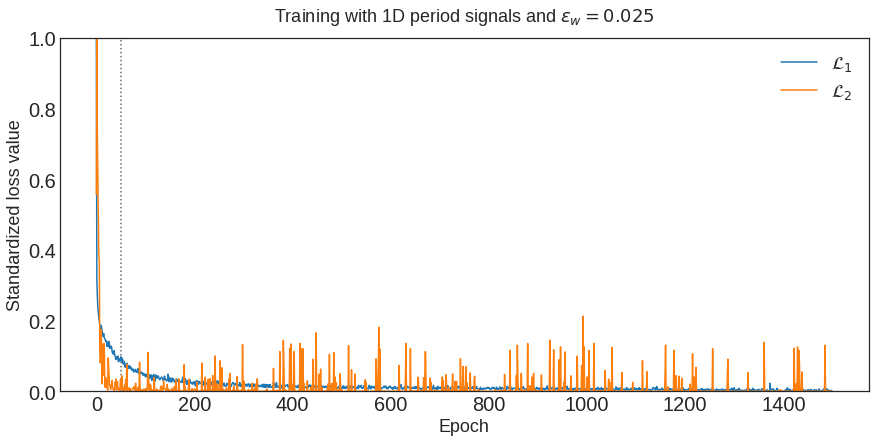

In [4]:
import matplotlib.pyplot as plt
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 6.5)
plt.style.use('seaborn-white')
plt.plot((hist_train-np.min(hist_train))/(np.max(hist_train)-np.min(hist_train)), label = '$\mathcal{L}_1$')
#plt.plot(hist_val/np.max(hist_val), label = 'Validation error')
plt.plot((hist_prior-np.min(hist_prior))/(np.max(hist_prior)-np.min(hist_prior)), label = '$\mathcal{L}_2$')
plt.ylabel('Standardized loss value', fontsize = 18)
plt.xlabel('Epoch', fontsize = 18)
plt.vlines(x=50, ymin=-0.1, ymax=1, color='black',linestyles ="dotted", alpha=0.6)
plt.title('Training with 1D period signals and $\epsilon_w=0.025$', fontsize = 18, y = 1.03)
plt.ylim(0,1)
plt.legend(fontsize=18)

In [5]:


results = []
num_classes = 2

learning_rate = 0.005
samples = 3000

for epsilon in [0.2]:
    for batch_size in [256]:
        for hidden_size in [100]:
            for EPS1 in [0.025]:
                for n in [100000]:
                    for aux_loss_activated in [True]:
                        for opt in [2]:
                            for t in range(1):
                                train_dataset, test_dataset = ut.load_files(dataset=1)
                                input_size = train_dataset.shape[1]-1
                                train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)                                
                                if n < 50000:
                                    train_dataset = ut.down_sampling(train_dataset)
                                    train_dataset = train_dataset.sample(n)
                                    print(train_dataset)
                                else: 
                                    trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                    print('shape: ', trainig_dataset_a.shape[0])
                                    n2 = n - trainig_dataset_a.shape[0]
                                    print('clase no RR Lrae', n2)
                                    trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                    train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                                                                
                                train_dataset = ut.sort_columns(train_dataset)
                                test_dataset = ut.sort_columns(test_dataset)
                                #train_dataset, test_dataset = ut.normalize(train_dataset, test_dataset)
                                test_dataset_pred = test_dataset.copy()
                                train_dataset_pred = train_dataset.copy()
                                try:
                                    data_prior = ut.generate_samples(samples, train_dataset, epsilon,  option = opt,  DRs={'feature':'Amplitude', 'up': 0.8, 'lp': 0.2})
                                    
                                    if train_dataset[train_dataset.label=='ClassB'].shape[0] >= samples:
                                        samples_prior = samples 
                                    else: 
                                        samples_prior = train_dataset[train_dataset.label=='ClassB'].shape[0]
                                    
                                    data_prior = pd.concat([data_prior, train_dataset[train_dataset.label=='ClassB'].sample(samples_prior)])

                                    train_dataset, test_dataset, data_prior = ut.normalize(train_dataset, test_dataset, data_prior)

                                    train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2)

                                    train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2)
                                    print(train_dataset_prior.columns)
                                    _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                    _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                    _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                    _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                    _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                    net = Net(input_size, hidden_size, hidden_size, num_classes)
                                    net.cuda()

                                    hist_val, hist_train, hist_prior = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                    EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)

                                except Exception as error:
                                    print(error) 
                                    print(str(epsilon)+"-"+str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28243
clase no RR Lrae 71757
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitu

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  106.5414891242981 -- aux loss:  19.276630699634552
training: epoch:  2  loss:  100.62867957353592 -- aux loss:  19.08183717727661
training: epoch:  3  loss:  100.23675346374512 -- aux loss:  18.967414915561676
training: epoch:  4  loss:  100.09288346767426 -- aux loss:  19.21098756790161
training: epoch:  5  loss:  100.0122319161892 -- aux loss:  18.82434219121933
training: epoch:  6  loss:  99.82909262180328 -- aux loss:  18.70154482126236
training: epoch:  7  loss:  99.80025711655617 -- aux loss:  18.624982357025146
training: epoch:  8  loss:  99.78327748179436 -- aux loss:  18.674678564071655
training: epoch:  9  loss:  99.69549745321274 -- aux loss:  18.770814955234528
training: epoch:  10  loss:  99.73922970890999 -- aux loss:  18.592707753181458
the_last_loss:  0.0
running_loss_val:  0.5348494648933411
validating: epoch:  10  loss:  0.5348494648933411
The current loss: 0.5348494648933411
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(4829,

training: epoch:  67  loss:  98.81175893545151 -- aux loss:  18.568057477474213
training: epoch:  68  loss:  98.856429874897 -- aux loss:  18.64712530374527
training: epoch:  69  loss:  98.8228787779808 -- aux loss:  18.673039495944977
training: epoch:  70  loss:  98.76789447665215 -- aux loss:  18.73000693321228
the_last_loss:  0.6465948820114136
running_loss_val:  0.6451622247695923
validating: epoch:  70  loss:  0.6451622247695923
The current loss: 0.6451622247695923
the_last_loss: 0.6465948820114136
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: epoch:  71  loss:  98.80203530192375 -- aux loss:  18.6471209526062
training: epoch:  72  loss:  98.79687178134918 -- aux loss:  18.647562861442566
training: epoch:  7

training: epoch:  131  loss:  98.5968186557293 -- aux loss:  18.759163677692413
training: epoch:  132  loss:  98.6108047068119 -- aux loss:  18.540709912776947
training: epoch:  133  loss:  98.58109098672867 -- aux loss:  18.619748055934906
training: epoch:  134  loss:  98.57141318917274 -- aux loss:  18.647086679935455
training: epoch:  135  loss:  98.50268030166626 -- aux loss:  18.56505584716797
training: epoch:  136  loss:  98.51174220442772 -- aux loss:  18.648954570293427
training: epoch:  137  loss:  98.53835415840149 -- aux loss:  18.677471935749054
training: epoch:  138  loss:  98.58114725351334 -- aux loss:  18.619769990444183
training: epoch:  139  loss:  98.50643348693848 -- aux loss:  18.53788524866104
training: epoch:  140  loss:  98.53013414144516 -- aux loss:  18.665292620658875
the_last_loss:  0.5354838371276855
running_loss_val:  0.5354841947555542
validating: epoch:  140  loss:  0.5354841947555542
The current loss: 0.5354841947555542
the_last_loss: 0.5354838371276855

training: epoch:  195  loss:  98.46310031414032 -- aux loss:  18.676142275333405
training: epoch:  196  loss:  98.46385139226913 -- aux loss:  18.729172706604004
training: epoch:  197  loss:  98.56448367238045 -- aux loss:  18.631918370723724
training: epoch:  198  loss:  98.49197939038277 -- aux loss:  18.647088587284088
training: epoch:  199  loss:  98.45270901918411 -- aux loss:  18.542445182800293
training: epoch:  200  loss:  98.44825273752213 -- aux loss:  18.64906018972397
the_last_loss:  0.721784234046936
running_loss_val:  0.7577059864997864
validating: epoch:  200  loss:  0.7577059864997864
The current loss: 0.7577059864997864
the_last_loss: 0.721784234046936
trigger times: 1
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training

training: epoch:  260  loss:  98.39590293169022 -- aux loss:  18.59496396780014
the_last_loss:  0.6465948820114136
running_loss_val:  0.5354837775230408
validating: epoch:  260  loss:  0.5354837775230408
The current loss: 0.5354837775230408
the_last_loss: 0.6465948820114136
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: epoch:  261  loss:  98.40277546644211 -- aux loss:  18.592474818229675
training: epoch:  262  loss:  98.42310026288033 -- aux loss:  18.59254002571106
training: epoch:  263  loss:  98.39610242843628 -- aux loss:  18.647106289863586
training: epoch:  264  loss:  98.39631578326225 -- aux loss:  18.593884706497192
training: epoch:  265  loss:  98.41721913218498 -- aux loss:  18.73056983947754
training

training: epoch:  321  loss:  98.38943469524384 -- aux loss:  18.56981760263443
training: epoch:  322  loss:  98.40048611164093 -- aux loss:  18.674685776233673
training: epoch:  323  loss:  98.3819035589695 -- aux loss:  18.619746565818787
training: epoch:  324  loss:  98.3977145254612 -- aux loss:  18.78380525112152
training: epoch:  325  loss:  98.43066468834877 -- aux loss:  18.64708638191223
training: epoch:  326  loss:  98.38718608021736 -- aux loss:  18.64864683151245
training: epoch:  327  loss:  98.38599345088005 -- aux loss:  18.649753034114838
training: epoch:  328  loss:  98.37927359342575 -- aux loss:  18.67443025112152
training: epoch:  329  loss:  98.399873316288 -- aux loss:  18.566169917583466
training: epoch:  330  loss:  98.36145547032356 -- aux loss:  18.565055310726166
the_last_loss:  0.7577059864997864
running_loss_val:  0.7577058672904968
validating: epoch:  330  loss:  0.7577058672904968
The current loss: 0.7577058672904968
the_last_loss: 0.7577059864997864
trig

training: epoch:  385  loss:  98.34412795305252 -- aux loss:  18.592399656772614
training: epoch:  386  loss:  98.35432142019272 -- aux loss:  18.619753062725067
training: epoch:  387  loss:  98.35101321339607 -- aux loss:  18.674430310726166
training: epoch:  388  loss:  98.42272520065308 -- aux loss:  18.73328149318695
training: epoch:  389  loss:  98.4064494073391 -- aux loss:  18.756461679935455
training: epoch:  390  loss:  98.360372453928 -- aux loss:  18.701773941516876
the_last_loss:  0.7577059864997864
running_loss_val:  0.7576971054077148
validating: epoch:  390  loss:  0.7576971054077148
The current loss: 0.7576971054077148
the_last_loss: 0.7577059864997864
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training:

training: epoch:  449  loss:  98.35447660088539 -- aux loss:  18.621239185333252
training: epoch:  450  loss:  98.41016992926598 -- aux loss:  18.647086560726166
the_last_loss:  0.4721066653728485
running_loss_val:  0.7577059864997864
validating: epoch:  450  loss:  0.7577059864997864
The current loss: 0.7577059864997864
the_last_loss: 0.4721066653728485
trigger times: 1
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: epoch:  451  loss:  98.34644421935081 -- aux loss:  18.619742810726166
training: epoch:  452  loss:  98.33050838112831 -- aux loss:  18.67443060874939
training: epoch:  453  loss:  98.32016637921333 -- aux loss:  18.566561102867126
training: epoch:  454  loss:  98.35738414525986 -- aux loss:  18.68608397245407
trainin

training: epoch:  511  loss:  98.36300307512283 -- aux loss:  18.565055310726166
training: epoch:  512  loss:  98.33706846833229 -- aux loss:  18.730613708496094
training: epoch:  513  loss:  98.33549684286118 -- aux loss:  18.6197429895401
training: epoch:  514  loss:  98.35121577978134 -- aux loss:  18.61974275112152
training: epoch:  515  loss:  98.39907824993134 -- aux loss:  18.565280735492706
training: epoch:  516  loss:  98.33577713370323 -- aux loss:  18.647086322307587
training: epoch:  517  loss:  98.34383031725883 -- aux loss:  18.565055191516876
training: epoch:  518  loss:  98.34886100888252 -- aux loss:  18.64708662033081
training: epoch:  519  loss:  98.33749741315842 -- aux loss:  18.59239900112152
training: epoch:  520  loss:  98.3429072201252 -- aux loss:  18.674430310726166
the_last_loss:  0.7577059864997864
running_loss_val:  0.6465948820114136
validating: epoch:  520  loss:  0.6465948820114136
The current loss: 0.6465948820114136
the_last_loss: 0.7577059864997864
t

training: epoch:  575  loss:  98.37026184797287 -- aux loss:  18.70177400112152
training: epoch:  576  loss:  98.35622861981392 -- aux loss:  18.56505525112152
training: epoch:  577  loss:  98.3545748591423 -- aux loss:  18.619742572307587
training: epoch:  578  loss:  98.3437696993351 -- aux loss:  18.67443013191223
training: epoch:  579  loss:  98.33834218978882 -- aux loss:  18.756461322307587
training: epoch:  580  loss:  98.32528841495514 -- aux loss:  18.67443025112152
the_last_loss:  0.8688170909881592
running_loss_val:  0.7577059864997864
validating: epoch:  580  loss:  0.7577059864997864
The current loss: 0.7577059864997864
the_last_loss: 0.8688170909881592
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: e

training: epoch:  639  loss:  98.36482402682304 -- aux loss:  18.701774060726166
training: epoch:  640  loss:  98.33374404907227 -- aux loss:  18.565055191516876
the_last_loss:  0.536306619644165
running_loss_val:  0.7829053401947021
validating: epoch:  640  loss:  0.7829053401947021
The current loss: 0.7829053401947021
the_last_loss: 0.536306619644165
trigger times: 1
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: epoch:  641  loss:  98.3408969938755 -- aux loss:  18.61974275112152
training: epoch:  642  loss:  98.33140361309052 -- aux loss:  18.619742929935455
training: epoch:  643  loss:  98.33408066630363 -- aux loss:  18.619742929935455
training: epoch:  644  loss:  98.34548681974411 -- aux loss:  18.592399299144745
training:

training: epoch:  701  loss:  98.31366267800331 -- aux loss:  18.619742572307587
training: epoch:  702  loss:  98.32655838131905 -- aux loss:  18.619742691516876
training: epoch:  703  loss:  98.32054623961449 -- aux loss:  18.811149060726166
training: epoch:  704  loss:  98.36764535307884 -- aux loss:  18.811148941516876
training: epoch:  705  loss:  98.35570678114891 -- aux loss:  18.73208248615265
training: epoch:  706  loss:  98.3511330485344 -- aux loss:  18.67443037033081
training: epoch:  707  loss:  98.36848494410515 -- aux loss:  18.592399060726166
training: epoch:  708  loss:  98.32429122924805 -- aux loss:  18.663304388523102
training: epoch:  709  loss:  98.31966495513916 -- aux loss:  18.619742810726166
training: epoch:  710  loss:  98.31263265013695 -- aux loss:  18.729117453098297
the_last_loss:  0.5354838371276855
running_loss_val:  0.42437273263931274
validating: epoch:  710  loss:  0.42437273263931274
The current loss: 0.42437273263931274
the_last_loss: 0.535483837127

training: epoch:  765  loss:  98.3386273086071 -- aux loss:  18.7564617395401
training: epoch:  766  loss:  98.32674211263657 -- aux loss:  18.5923992395401
training: epoch:  767  loss:  98.33106687664986 -- aux loss:  18.56505525112152
training: epoch:  768  loss:  98.31363570690155 -- aux loss:  18.647086322307587
training: epoch:  769  loss:  98.33038032054901 -- aux loss:  18.647110164165497
training: epoch:  770  loss:  98.33991560339928 -- aux loss:  18.619742572307587
the_last_loss:  0.6461854577064514
running_loss_val:  0.7579209804534912
validating: epoch:  770  loss:  0.7579209804534912
The current loss: 0.7579209804534912
the_last_loss: 0.6461854577064514
trigger times: 1
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: e

training: epoch:  830  loss:  98.32065299153328 -- aux loss:  18.75646150112152
the_last_loss:  0.7577059864997864
running_loss_val:  0.7576080560684204
validating: epoch:  830  loss:  0.7576080560684204
The current loss: 0.7576080560684204
the_last_loss: 0.7577059864997864
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: epoch:  831  loss:  98.32160750031471 -- aux loss:  18.70177388191223
training: epoch:  832  loss:  98.32221981883049 -- aux loss:  18.59239900112152
training: epoch:  833  loss:  98.34518167376518 -- aux loss:  18.619742810726166
training: epoch:  834  loss:  98.32702574133873 -- aux loss:  18.64708638191223
training: epoch:  835  loss:  98.3268606364727 -- aux loss:  18.674430191516876
training: 

training: epoch:  891  loss:  98.3052154481411 -- aux loss:  18.729117810726166
training: epoch:  892  loss:  98.32708874344826 -- aux loss:  18.6470867395401
training: epoch:  893  loss:  98.33240422606468 -- aux loss:  18.592399060726166
training: epoch:  894  loss:  98.33433505892754 -- aux loss:  18.756461441516876
training: epoch:  895  loss:  98.32073113322258 -- aux loss:  18.59239900112152
training: epoch:  896  loss:  98.34490844607353 -- aux loss:  18.64708650112152
training: epoch:  897  loss:  98.32131597399712 -- aux loss:  18.64708650112152
training: epoch:  898  loss:  98.31411159038544 -- aux loss:  18.510367810726166
training: epoch:  899  loss:  98.3129352927208 -- aux loss:  18.70177400112152
training: epoch:  900  loss:  98.3310172855854 -- aux loss:  18.75646162033081
the_last_loss:  0.7577059864997864
running_loss_val:  0.8688170909881592
validating: epoch:  900  loss:  0.8688170909881592
The current loss: 0.8688170909881592
the_last_loss: 0.7577059864997864
trigg

training: epoch:  956  loss:  98.30156880617142 -- aux loss:  18.565055310726166
training: epoch:  957  loss:  98.30871790647507 -- aux loss:  18.59239912033081
training: epoch:  958  loss:  98.33156928420067 -- aux loss:  18.510367810726166
training: epoch:  959  loss:  98.33667582273483 -- aux loss:  18.537711679935455
training: epoch:  960  loss:  98.31766429543495 -- aux loss:  18.70177412033081
the_last_loss:  0.5354838371276855
running_loss_val:  0.6465948820114136
validating: epoch:  960  loss:  0.6465948820114136
The current loss: 0.6465948820114136
the_last_loss: 0.5354838371276855
trigger times: 1
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: epoch:  961  loss:  98.32139641046524 -- aux loss:  18.56505525112152
training

training: epoch:  1020  loss:  98.2861538529396 -- aux loss:  18.703257858753204
the_last_loss:  0.911026656627655
running_loss_val:  0.7577059864997864
validating: epoch:  1020  loss:  0.7577059864997864
The current loss: 0.7577059864997864
the_last_loss: 0.911026656627655
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: epoch:  1021  loss:  98.2926553785801 -- aux loss:  18.701773941516876
training: epoch:  1022  loss:  98.2785609960556 -- aux loss:  18.674430310726166
training: epoch:  1023  loss:  98.2895750105381 -- aux loss:  18.674430310726166
training: epoch:  1024  loss:  98.32053929567337 -- aux loss:  18.75646138191223
training: epoch:  1025  loss:  98.33442455530167 -- aux loss:  18.61974287033081
traini

training: epoch:  1081  loss:  98.28958678245544 -- aux loss:  18.537711799144745
training: epoch:  1082  loss:  98.29553037881851 -- aux loss:  18.619742810726166
training: epoch:  1083  loss:  98.33874887228012 -- aux loss:  18.64708662033081
training: epoch:  1084  loss:  98.30528798699379 -- aux loss:  18.537711441516876
training: epoch:  1085  loss:  98.30020546913147 -- aux loss:  18.72911763191223
training: epoch:  1086  loss:  98.29416859149933 -- aux loss:  18.647086679935455
training: epoch:  1087  loss:  98.30784851312637 -- aux loss:  18.619742810726166
training: epoch:  1088  loss:  98.31592160463333 -- aux loss:  18.61974275112152
training: epoch:  1089  loss:  98.28618174791336 -- aux loss:  18.67443025112152
training: epoch:  1090  loss:  98.28735166788101 -- aux loss:  18.674430429935455
the_last_loss:  0.7577059864997864
running_loss_val:  0.5354837775230408
validating: epoch:  1090  loss:  0.5354837775230408
The current loss: 0.5354837775230408
the_last_loss: 0.75770

training: epoch:  1145  loss:  98.33320254087448 -- aux loss:  18.592398941516876
training: epoch:  1146  loss:  98.35073962807655 -- aux loss:  18.53771162033081
training: epoch:  1147  loss:  98.31472501158714 -- aux loss:  18.619742572307587
training: epoch:  1148  loss:  98.29695388674736 -- aux loss:  18.729117929935455
training: epoch:  1149  loss:  98.28450432419777 -- aux loss:  18.566539347171783
training: epoch:  1150  loss:  98.32998859882355 -- aux loss:  18.62023037672043
the_last_loss:  0.6465948820114136
running_loss_val:  0.7577059864997864
validating: epoch:  1150  loss:  0.7577059864997864
The current loss: 0.7577059864997864
the_last_loss: 0.6465948820114136
trigger times: 1
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')


training: epoch:  1209  loss:  98.29406404495239 -- aux loss:  18.647086560726166
training: epoch:  1210  loss:  98.28703966736794 -- aux loss:  18.59239912033081
the_last_loss:  0.6465948820114136
running_loss_val:  0.6465948820114136
validating: epoch:  1210  loss:  0.6465948820114136
The current loss: 0.6465948820114136
the_last_loss: 0.6465948820114136
trigger times: 3
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: epoch:  1211  loss:  98.34833270311356 -- aux loss:  18.535437166690826
training: epoch:  1212  loss:  98.3166415989399 -- aux loss:  18.674430310726166
training: epoch:  1213  loss:  98.31052884459496 -- aux loss:  18.674430072307587
training: epoch:  1214  loss:  98.31122547388077 -- aux loss:  18.729117810726166


training: epoch:  1271  loss:  98.27448505163193 -- aux loss:  18.592399299144745
training: epoch:  1272  loss:  98.28772714734077 -- aux loss:  18.565055429935455
training: epoch:  1273  loss:  98.303875207901 -- aux loss:  18.5650554895401
training: epoch:  1274  loss:  98.29113766551018 -- aux loss:  18.619742572307587
training: epoch:  1275  loss:  98.31181380152702 -- aux loss:  18.510367810726166
training: epoch:  1276  loss:  98.29284498095512 -- aux loss:  18.674430191516876
training: epoch:  1277  loss:  98.28940138220787 -- aux loss:  18.53771150112152
training: epoch:  1278  loss:  98.29655545949936 -- aux loss:  18.61974275112152
training: epoch:  1279  loss:  98.29307094216347 -- aux loss:  18.72911763191223
training: epoch:  1280  loss:  98.28186079859734 -- aux loss:  18.647746980190277
the_last_loss:  0.8688170909881592
running_loss_val:  0.8688170909881592
validating: epoch:  1280  loss:  0.8688170909881592
The current loss: 0.8688170909881592
the_last_loss: 0.86881709

training: epoch:  1335  loss:  98.28478133678436 -- aux loss:  18.5923992395401
training: epoch:  1336  loss:  98.28118380904198 -- aux loss:  18.64708638191223
training: epoch:  1337  loss:  98.27963444590569 -- aux loss:  18.59239912033081
training: epoch:  1338  loss:  98.26987281441689 -- aux loss:  18.70177412033081
training: epoch:  1339  loss:  98.28870421648026 -- aux loss:  18.592399179935455
training: epoch:  1340  loss:  98.29752042889595 -- aux loss:  18.674430310726166
the_last_loss:  0.7577059864997864
running_loss_val:  0.5354837775230408
validating: epoch:  1340  loss:  0.5354837775230408
The current loss: 0.5354837775230408
the_last_loss: 0.7577059864997864
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
tra

training: epoch:  1399  loss:  98.27832135558128 -- aux loss:  18.674430191516876
training: epoch:  1400  loss:  98.27017715573311 -- aux loss:  18.729117929935455
the_last_loss:  0.6465948820114136
running_loss_val:  0.42437273263931274
validating: epoch:  1400  loss:  0.42437273263931274
The current loss: 0.42437273263931274
the_last_loss: 0.6465948820114136
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7464, device='cuda:0')
sum mask2 - L3:  tensor(141, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2536, device='cuda:0')
sum mask1 - L3 (aux):  tensor(59, device='cuda:0')
training: epoch:  1401  loss:  98.28048011660576 -- aux loss:  18.729117691516876
training: epoch:  1402  loss:  98.28507080674171 -- aux loss:  18.67443037033081
training: epoch:  1403  loss:  98.27529686689377 -- aux loss:  18.729117512702942
training: epoch:  1404  loss:  98.26970946788788 -- aux loss:  18.565055429935

training: epoch:  1461  loss:  98.27406817674637 -- aux loss:  18.70177412033081
training: epoch:  1462  loss:  98.27361458539963 -- aux loss:  18.56389158964157
training: epoch:  1463  loss:  98.29949808120728 -- aux loss:  18.619742691516876
training: epoch:  1464  loss:  98.30714359879494 -- aux loss:  18.537711679935455
training: epoch:  1465  loss:  98.27786010503769 -- aux loss:  18.67443025112152
training: epoch:  1466  loss:  98.29028835892677 -- aux loss:  18.61974275112152
training: epoch:  1467  loss:  98.29722163081169 -- aux loss:  18.59239912033081
training: epoch:  1468  loss:  98.31358888745308 -- aux loss:  18.61974275112152
training: epoch:  1469  loss:  98.27545699477196 -- aux loss:  18.674430310726166
training: epoch:  1470  loss:  98.28862115740776 -- aux loss:  18.592399060726166
the_last_loss:  0.6465948820114136
running_loss_val:  0.7564752101898193
validating: epoch:  1470  loss:  0.7564752101898193
The current loss: 0.7564752101898193
the_last_loss: 0.6465948

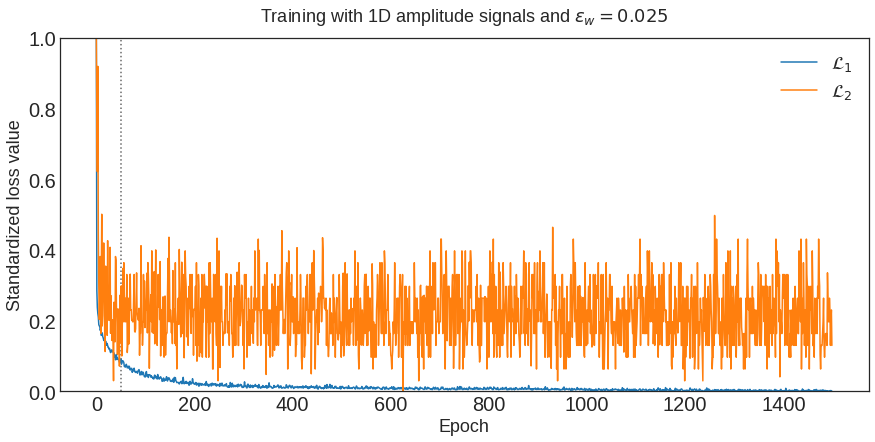

In [6]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 6.5)
plt.style.use('seaborn-white')
plt.plot((hist_train-np.min(hist_train))/(np.max(hist_train)-np.min(hist_train)), label = '$\mathcal{L}_1$')
#plt.plot(hist_val/np.max(hist_val), label = 'Validation error')
plt.plot((hist_prior-np.min(hist_prior))/(np.max(hist_prior)-np.min(hist_prior)), label = '$\mathcal{L}_2$')
plt.ylabel('Standardized loss value', fontsize = 18)
plt.xlabel('Epoch', fontsize = 18)
plt.vlines(x=50, ymin=-0.1, ymax=1, color='black',linestyles ="dotted", alpha=0.6)
plt.title('Training with 1D amplitude signals and $\epsilon_w=0.025$', fontsize = 18, y = 1.03)
plt.ylim(0,1)
plt.legend(fontsize=18)

In [7]:

results = []
num_classes = 2
learning_rate = 0.005
samples = 3000
epsilon=0
#for epsilon in [0.1, 0.05, 0.025, 0.15]:
for batch_size in [256]:
    for hidden_size in [100]:
        for aux_loss_activated in [True]:
            for EPS1 in [0.025]:
                for n in [100000]:
                    for opt in [1]:
                        for t in range(1):
                            train_dataset, test_dataset = ut.load_files(dataset=1)
                            input_size = train_dataset.shape[1]-1
                            train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

                            if n < 50000:
                                train_dataset = ut.down_sampling(train_dataset)
                                train_dataset = train_dataset.sample(n)
                                print(train_dataset)
                            else: 
                                trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                print('shape: ', trainig_dataset_a.shape[0])
                                n2 = n - trainig_dataset_a.shape[0]
                                print('clase no RR Lrae', n2)
                                trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                            


                            train_dataset = ut.sort_columns(train_dataset)
                            test_dataset = ut.sort_columns(test_dataset)
                            #train_dataset, test_dataset = ut.normalize(train_dataset, test_dataset)
                            test_dataset_pred = test_dataset.copy()
                            train_dataset_pred = train_dataset.copy()

                            try:
                                data_prior = ut.generate_samples_2D(samples, train_dataset, distribution='uniform')

                                if train_dataset[train_dataset.label=='ClassB'].shape[0] >= samples:
                                    samples_prior = samples 
                                else: 
                                    samples_prior = train_dataset[train_dataset.label=='ClassB'].shape[0] 
                                
                                data_prior = pd.concat([data_prior, train_dataset[train_dataset.label=='ClassB'].sample(samples_prior)])

                                train_dataset, test_dataset, data_prior = ut.normalize(train_dataset, test_dataset, data_prior)

                                train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2)

                                train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2)
                                print(train_dataset_prior.columns)
                                _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                net = Net(input_size, hidden_size, hidden_size, num_classes)
                                net.cuda()

                                hist_val, hist_train, hist_prior = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)
                            except Exception as e:
                                print(e) 
                                print(str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
shape:  28243
clase no RR Lrae 71757
uniform
starting
(3000, 1)
(3000, 1)
(3000, 2)
befora concat
phase 1
phase 1.2
phase 1.3
(3000, 61)
phase 1.4
phase 2
phase 3
(6000, 61)
(6000, 61)
Index(['PeriodLS', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmoni

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


shape tensor:  torch.Size([100000, 60])
____get_tensor_function____
shape tensor:  torch.Size([1800, 60])
____get_tensor_function____
shape tensor:  torch.Size([27293, 60])
____get_tensor_function____
shape tensor:  torch.Size([27293, 60])
{'fc1.weight': Parameter containing:
tensor([[-0.0280,  0.0558,  0.0994,  ..., -0.0413,  0.0502, -0.1071],
        [-0.1287,  0.0547, -0.0114,  ..., -0.0491,  0.0709,  0.0206],
        [ 0.0396,  0.0567,  0.1010,  ..., -0.0194,  0.0495, -0.0511],
        ...,
        [-0.0642,  0.0263, -0.0885,  ...,  0.0572, -0.0939,  0.0036],
        [-0.0336,  0.1213,  0.0963,  ..., -0.0995, -0.0992,  0.0534],
        [ 0.0004,  0.0088, -0.0754,  ...,  0.0499,  0.0665,  0.0716]],
       device='cuda:0', requires_grad=True), 'fc1.bias': Parameter containing:
tensor([ 0.1186,  0.1233, -0.0557, -0.0502, -0.0900, -0.0180, -0.0087, -0.0208,
         0.1080,  0.0876, -0.0517,  0.0126, -0.0171, -0.0652,  0.0394,  0.0577,
        -0.0790, -0.0242, -0.0504, -0.0232,  0.015

training: epoch:  1  loss:  106.25952932238579 -- aux loss:  18.682894974946976
training: epoch:  2  loss:  100.79374054074287 -- aux loss:  18.855531960725784
training: epoch:  3  loss:  100.35926750302315 -- aux loss:  19.410557210445404
training: epoch:  4  loss:  100.1260626912117 -- aux loss:  18.93425965309143
training: epoch:  5  loss:  99.94221949577332 -- aux loss:  19.000066876411438
training: epoch:  6  loss:  99.91053840517998 -- aux loss:  18.837229251861572
training: epoch:  7  loss:  99.74357599020004 -- aux loss:  19.132974982261658
training: epoch:  8  loss:  99.70483022928238 -- aux loss:  18.931341350078583
training: epoch:  9  loss:  99.64329645037651 -- aux loss:  18.805045902729034
training: epoch:  10  loss:  99.74045491218567 -- aux loss:  18.789453983306885
the_last_loss:  0.0
running_loss_val:  0.5667389631271362
validating: epoch:  10  loss:  0.5667389631271362
The current loss: 0.5667389631271362
the_last_loss: 0.0
trigger times: 1
sum mask2 - L1:  tensor(48

training: epoch:  67  loss:  98.82633718848228 -- aux loss:  9.091890841722488
training: epoch:  68  loss:  98.89238321781158 -- aux loss:  9.123341113328934
training: epoch:  69  loss:  98.73756113648415 -- aux loss:  9.121741473674774
training: epoch:  70  loss:  98.68711641430855 -- aux loss:  9.113832980394363
the_last_loss:  0.31326165795326233
running_loss_val:  0.44849908351898193
validating: epoch:  70  loss:  0.44849908351898193
The current loss: 0.44849908351898193
the_last_loss: 0.31326165795326233
trigger times: 1
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  71  loss:  98.72632092237473 -- aux loss:  9.09634181857109
training: epoch:  72  loss:  98.79356700181961 -- aux loss:  9.103160917758942
training: epoc

training: epoch:  131  loss:  98.63578164577484 -- aux loss:  9.090075701475143
training: epoch:  132  loss:  98.60271555185318 -- aux loss:  9.090053588151932
training: epoch:  133  loss:  98.54790902137756 -- aux loss:  9.545562654733658
training: epoch:  134  loss:  98.52025207877159 -- aux loss:  9.088960498571396
training: epoch:  135  loss:  98.62506568431854 -- aux loss:  9.094418793916702
training: epoch:  136  loss:  98.55965453386307 -- aux loss:  9.16255608201027
training: epoch:  137  loss:  98.52123388648033 -- aux loss:  9.095561802387238
training: epoch:  138  loss:  98.56765052676201 -- aux loss:  9.10144168138504
training: epoch:  139  loss:  98.49912804365158 -- aux loss:  9.097181737422943
training: epoch:  140  loss:  98.56851160526276 -- aux loss:  9.093011558055878
the_last_loss:  0.42398589849472046
running_loss_val:  0.5639358162879944
validating: epoch:  140  loss:  0.5639358162879944
The current loss: 0.5639358162879944
the_last_loss: 0.42398589849472046
trigg

training: epoch:  196  loss:  98.50476783514023 -- aux loss:  9.08926185965538
training: epoch:  197  loss:  98.51263561844826 -- aux loss:  9.329937040805817
training: epoch:  198  loss:  98.5009033381939 -- aux loss:  9.085334658622742
training: epoch:  199  loss:  98.47410935163498 -- aux loss:  9.291709810495377
training: epoch:  200  loss:  98.46030363440514 -- aux loss:  9.084590494632721
the_last_loss:  1.1881015300750732
running_loss_val:  0.4076377749443054
validating: epoch:  200  loss:  0.4076377749443054
The current loss: 0.4076377749443054
the_last_loss: 1.1881015300750732
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  201  loss:  98.45027947425842 -- aux loss:  9.095619201660156
training: epo

training: epoch:  261  loss:  98.44094055891037 -- aux loss:  9.084587275981903
training: epoch:  262  loss:  98.4286644756794 -- aux loss:  9.084587216377258
training: epoch:  263  loss:  98.41029661893845 -- aux loss:  9.084612429141998
training: epoch:  264  loss:  98.40901678800583 -- aux loss:  9.089506953954697
training: epoch:  265  loss:  98.43242463469505 -- aux loss:  9.367026329040527
training: epoch:  266  loss:  98.39990568161011 -- aux loss:  9.086401015520096
training: epoch:  267  loss:  98.39170217514038 -- aux loss:  9.20566326379776
training: epoch:  268  loss:  98.40490108728409 -- aux loss:  9.084872454404831
training: epoch:  269  loss:  98.41902381181717 -- aux loss:  9.086142599582672
training: epoch:  270  loss:  98.43133154511452 -- aux loss:  9.084615886211395
the_last_loss:  1.18826162815094
running_loss_val:  0.44897574186325073
validating: epoch:  270  loss:  0.44897574186325073
The current loss: 0.44897574186325073
the_last_loss: 1.18826162815094
trigger 

training: epoch:  326  loss:  98.43914303183556 -- aux loss:  9.084587693214417
training: epoch:  327  loss:  98.38232335448265 -- aux loss:  9.086149036884308
training: epoch:  328  loss:  98.39919203519821 -- aux loss:  9.481694102287292
training: epoch:  329  loss:  98.3671286702156 -- aux loss:  9.093894749879837
training: epoch:  330  loss:  98.36583378911018 -- aux loss:  9.084588646888733
the_last_loss:  0.35388147830963135
running_loss_val:  0.31326162815093994
validating: epoch:  330  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.35388147830963135
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  331  loss:  98.39721006155014 -- aux loss:  9.089977443218231
trainin

training: epoch:  391  loss:  98.36982655525208 -- aux loss:  9.090880036354065
training: epoch:  392  loss:  98.35662007331848 -- aux loss:  9.084587335586548
training: epoch:  393  loss:  98.38475894927979 -- aux loss:  9.084589183330536
training: epoch:  394  loss:  98.35144275426865 -- aux loss:  9.084587305784225
training: epoch:  395  loss:  98.32802185416222 -- aux loss:  9.087174266576767
training: epoch:  396  loss:  98.35801458358765 -- aux loss:  9.08703300356865
training: epoch:  397  loss:  98.33236819505692 -- aux loss:  9.135791152715683
training: epoch:  398  loss:  98.37479817867279 -- aux loss:  9.090072363615036
training: epoch:  399  loss:  98.34451094269753 -- aux loss:  9.18095088005066
training: epoch:  400  loss:  98.35886526107788 -- aux loss:  9.087383061647415
the_last_loss:  0.4971289336681366
running_loss_val:  1.31326162815094
validating: epoch:  400  loss:  1.31326162815094
The current loss: 1.31326162815094
the_last_loss: 0.4971289336681366
trigger times

training: epoch:  456  loss:  98.35156625509262 -- aux loss:  9.09946209192276
training: epoch:  457  loss:  98.38447478413582 -- aux loss:  9.281042844057083
training: epoch:  458  loss:  98.34722915291786 -- aux loss:  9.09380054473877
training: epoch:  459  loss:  98.33891767263412 -- aux loss:  9.17031541466713
training: epoch:  460  loss:  98.34465029835701 -- aux loss:  9.088542491197586
the_last_loss:  0.6882615685462952
running_loss_val:  0.9801751971244812
validating: epoch:  460  loss:  0.9801751971244812
The current loss: 0.9801751971244812
the_last_loss: 0.6882615685462952
trigger times: 4
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  461  loss:  98.31388884782791 -- aux loss:  9.086148023605347
training: epoc

training: epoch:  521  loss:  98.33211323618889 -- aux loss:  9.28793728351593
training: epoch:  522  loss:  98.31892156600952 -- aux loss:  9.084587216377258
training: epoch:  523  loss:  98.31295588612556 -- aux loss:  9.084587216377258
training: epoch:  524  loss:  98.32730829715729 -- aux loss:  9.084587216377258
training: epoch:  525  loss:  98.32591146230698 -- aux loss:  9.084596574306488
training: epoch:  526  loss:  98.32476788759232 -- aux loss:  9.511479169130325
training: epoch:  527  loss:  98.3383232653141 -- aux loss:  9.092383086681366
training: epoch:  528  loss:  98.33983278274536 -- aux loss:  9.09059053659439
training: epoch:  529  loss:  98.32033291459084 -- aux loss:  9.085380345582962
training: epoch:  530  loss:  98.30502730607986 -- aux loss:  9.087063312530518
the_last_loss:  1.06326162815094
running_loss_val:  1.31326162815094
validating: epoch:  530  loss:  1.31326162815094
The current loss: 1.31326162815094
the_last_loss: 1.06326162815094
trigger times: 2
s

training: epoch:  586  loss:  98.33421748876572 -- aux loss:  9.084587752819061
training: epoch:  587  loss:  98.3240068256855 -- aux loss:  9.088485717773438
training: epoch:  588  loss:  98.30765709280968 -- aux loss:  9.087794721126556
training: epoch:  589  loss:  98.31300589442253 -- aux loss:  9.084587216377258
training: epoch:  590  loss:  98.33767518401146 -- aux loss:  9.084587514400482
the_last_loss:  0.4382624626159668
running_loss_val:  0.31326162815093994
validating: epoch:  590  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 0.4382624626159668
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  591  loss:  98.31308686733246 -- aux loss:  9.084588050842285
training:

training: epoch:  651  loss:  98.31297951936722 -- aux loss:  9.08849349617958
training: epoch:  652  loss:  98.32321780920029 -- aux loss:  9.084587216377258
training: epoch:  653  loss:  98.30918338894844 -- aux loss:  9.08458724617958
training: epoch:  654  loss:  98.3203853070736 -- aux loss:  9.136881202459335
training: epoch:  655  loss:  98.34021934866905 -- aux loss:  9.09003061056137
training: epoch:  656  loss:  98.33296677470207 -- aux loss:  9.084587216377258
training: epoch:  657  loss:  98.30215826630592 -- aux loss:  9.084644258022308
training: epoch:  658  loss:  98.36687359213829 -- aux loss:  9.08463579416275
training: epoch:  659  loss:  98.3357001543045 -- aux loss:  9.085805654525757
training: epoch:  660  loss:  98.33265602588654 -- aux loss:  9.086069643497467
the_last_loss:  0.6882615685462952
running_loss_val:  0.3153272867202759
validating: epoch:  660  loss:  0.3153272867202759
The current loss: 0.3153272867202759
the_last_loss: 0.6882615685462952
trigger tim

training: epoch:  716  loss:  98.36356830596924 -- aux loss:  9.088498383760452
training: epoch:  717  loss:  98.31286197900772 -- aux loss:  9.084598273038864
training: epoch:  718  loss:  98.32913303375244 -- aux loss:  9.084587514400482
training: epoch:  719  loss:  98.2963427901268 -- aux loss:  9.137220829725266
training: epoch:  720  loss:  98.32955613732338 -- aux loss:  9.098094761371613
the_last_loss:  0.45572522282600403
running_loss_val:  1.18826162815094
validating: epoch:  720  loss:  1.18826162815094
The current loss: 1.18826162815094
the_last_loss: 0.45572522282600403
trigger times: 2
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  721  loss:  98.3335562646389 -- aux loss:  9.140080630779266
training: epoch: 

training: epoch:  781  loss:  98.2946121096611 -- aux loss:  9.084587216377258
training: epoch:  782  loss:  98.2963285446167 -- aux loss:  9.086080819368362
training: epoch:  783  loss:  98.30444687604904 -- aux loss:  9.084587216377258
training: epoch:  784  loss:  98.3144753575325 -- aux loss:  9.088495910167694
training: epoch:  785  loss:  98.3348841369152 -- aux loss:  9.09099218249321
training: epoch:  786  loss:  98.35232049226761 -- aux loss:  9.100347220897675
training: epoch:  787  loss:  98.31113547086716 -- aux loss:  9.117240309715271
training: epoch:  788  loss:  98.31794878840446 -- aux loss:  9.185414016246796
training: epoch:  789  loss:  98.32861438393593 -- aux loss:  9.084587216377258
training: epoch:  790  loss:  98.31872963905334 -- aux loss:  9.088478684425354
the_last_loss:  0.31326162815093994
running_loss_val:  0.9377063512802124
validating: epoch:  790  loss:  0.9377063512802124
The current loss: 0.9377063512802124
the_last_loss: 0.31326162815093994
trigger 

training: epoch:  846  loss:  98.29239097237587 -- aux loss:  9.08459159731865
training: epoch:  847  loss:  98.33416056632996 -- aux loss:  9.08618688583374
training: epoch:  848  loss:  98.31651720404625 -- aux loss:  9.214112371206284
training: epoch:  849  loss:  98.3062025308609 -- aux loss:  9.086072742938995
training: epoch:  850  loss:  98.30851686000824 -- aux loss:  9.08860382437706
the_last_loss:  0.3582637310028076
running_loss_val:  0.31328898668289185
validating: epoch:  850  loss:  0.31328898668289185
The current loss: 0.31328898668289185
the_last_loss: 0.3582637310028076
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  851  loss:  98.30696520209312 -- aux loss:  9.089706033468246
training: ep

training: epoch:  911  loss:  98.30263394117355 -- aux loss:  9.27084219455719
training: epoch:  912  loss:  98.2971088886261 -- aux loss:  9.086018532514572
training: epoch:  913  loss:  98.30500078201294 -- aux loss:  9.084587216377258
training: epoch:  914  loss:  98.3396252989769 -- aux loss:  9.084587216377258
training: epoch:  915  loss:  98.30309617519379 -- aux loss:  9.08514678478241
training: epoch:  916  loss:  98.29871693253517 -- aux loss:  9.084595203399658
training: epoch:  917  loss:  98.3344409763813 -- aux loss:  9.084587216377258
training: epoch:  918  loss:  98.33891174197197 -- aux loss:  9.093883901834488
training: epoch:  919  loss:  98.32428333163261 -- aux loss:  9.085420846939087
training: epoch:  920  loss:  98.30007627606392 -- aux loss:  9.08543998003006
the_last_loss:  0.31326162815093994
running_loss_val:  0.3132617473602295
validating: epoch:  920  loss:  0.3132617473602295
The current loss: 0.3132617473602295
the_last_loss: 0.31326162815093994
trigger t

training: epoch:  976  loss:  98.32029342651367 -- aux loss:  9.09237664937973
training: epoch:  977  loss:  98.3093104660511 -- aux loss:  9.08458724617958
training: epoch:  978  loss:  98.29469209909439 -- aux loss:  9.089977413415909
training: epoch:  979  loss:  98.29359340667725 -- aux loss:  9.08588793873787
training: epoch:  980  loss:  98.3082460463047 -- aux loss:  9.086673319339752
the_last_loss:  0.31326162815093994
running_loss_val:  0.3140014410018921
validating: epoch:  980  loss:  0.3140014410018921
The current loss: 0.3140014410018921
the_last_loss: 0.31326162815093994
trigger times: 2
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  981  loss:  98.31418743729591 -- aux loss:  9.220664322376251
training: epoc

training: epoch:  1040  loss:  98.32057812809944 -- aux loss:  9.084587216377258
the_last_loss:  0.8916624188423157
running_loss_val:  0.5981869101524353
validating: epoch:  1040  loss:  0.5981869101524353
The current loss: 0.5981869101524353
the_last_loss: 0.8916624188423157
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  1041  loss:  98.30123767256737 -- aux loss:  9.084587216377258
training: epoch:  1042  loss:  98.30530554056168 -- aux loss:  9.12122443318367
training: epoch:  1043  loss:  98.30520007014275 -- aux loss:  9.153919488191605
training: epoch:  1044  loss:  98.35432815551758 -- aux loss:  9.09925389289856
training: epoch:  1045  loss:  98.3233975470066 -- aux loss:  9.2590891122818
training:

training: epoch:  1101  loss:  98.2984399497509 -- aux loss:  9.084587335586548
training: epoch:  1102  loss:  98.32218831777573 -- aux loss:  9.08755537867546
training: epoch:  1103  loss:  98.30103921890259 -- aux loss:  9.086817175149918
training: epoch:  1104  loss:  98.28927809000015 -- aux loss:  9.552533000707626
training: epoch:  1105  loss:  98.29969444870949 -- aux loss:  9.086071163415909
training: epoch:  1106  loss:  98.34685665369034 -- aux loss:  9.088463068008423
training: epoch:  1107  loss:  98.31530705094337 -- aux loss:  9.093867659568787
training: epoch:  1108  loss:  98.29086777567863 -- aux loss:  9.088493466377258
training: epoch:  1109  loss:  98.29454344511032 -- aux loss:  9.084587216377258
training: epoch:  1110  loss:  98.30358663201332 -- aux loss:  9.086067706346512
the_last_loss:  0.31326162815093994
running_loss_val:  1.06326162815094
validating: epoch:  1110  loss:  1.06326162815094
The current loss: 1.06326162815094
the_last_loss: 0.31326162815093994


training: epoch:  1165  loss:  98.30075314640999 -- aux loss:  9.087579190731049
training: epoch:  1166  loss:  98.2957575917244 -- aux loss:  9.08458885550499
training: epoch:  1167  loss:  98.29742410779 -- aux loss:  9.086464524269104
training: epoch:  1168  loss:  98.31878498196602 -- aux loss:  9.088252753019333
training: epoch:  1169  loss:  98.2911966741085 -- aux loss:  9.088493376970291
training: epoch:  1170  loss:  98.29974508285522 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.31332099437713623
validating: epoch:  1170  loss:  0.31332099437713623
The current loss: 0.31332099437713623
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
train

training: epoch:  1229  loss:  98.30380433797836 -- aux loss:  9.084587335586548
training: epoch:  1230  loss:  98.30864983797073 -- aux loss:  9.09909525513649
the_last_loss:  0.5559106469154358
running_loss_val:  0.5632615685462952
validating: epoch:  1230  loss:  0.5632615685462952
The current loss: 0.5632615685462952
the_last_loss: 0.5559106469154358
trigger times: 3
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  1231  loss:  98.29629760980606 -- aux loss:  9.407104551792145
training: epoch:  1232  loss:  98.33281409740448 -- aux loss:  9.084587216377258
training: epoch:  1233  loss:  98.2958807349205 -- aux loss:  9.084587216377258
training: epoch:  1234  loss:  98.30872404575348 -- aux loss:  9.084587275981903
traini

training: epoch:  1291  loss:  98.30713224411011 -- aux loss:  9.084587216377258
training: epoch:  1292  loss:  98.29562199115753 -- aux loss:  9.084587216377258
training: epoch:  1293  loss:  98.28754779696465 -- aux loss:  9.084587216377258
training: epoch:  1294  loss:  98.31062775850296 -- aux loss:  9.225162237882614
training: epoch:  1295  loss:  98.2873001396656 -- aux loss:  9.084587574005127
training: epoch:  1296  loss:  98.28941723704338 -- aux loss:  9.084587216377258
training: epoch:  1297  loss:  98.31316837668419 -- aux loss:  9.15919879078865
training: epoch:  1298  loss:  98.31487318873405 -- aux loss:  9.084587216377258
training: epoch:  1299  loss:  98.30853545665741 -- aux loss:  9.084587216377258
training: epoch:  1300  loss:  98.29446759819984 -- aux loss:  9.084587544202805
the_last_loss:  1.18826162815094
running_loss_val:  0.31326162815093994
validating: epoch:  1300  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.188261628150

training: epoch:  1355  loss:  98.2886414527893 -- aux loss:  9.084587216377258
training: epoch:  1356  loss:  98.30245491862297 -- aux loss:  9.084587216377258
training: epoch:  1357  loss:  98.30009540915489 -- aux loss:  9.084587216377258
training: epoch:  1358  loss:  98.30606386065483 -- aux loss:  9.084587216377258
training: epoch:  1359  loss:  98.28850835561752 -- aux loss:  9.084604918956757
training: epoch:  1360  loss:  98.28181564807892 -- aux loss:  9.084587544202805
the_last_loss:  1.0374770164489746
running_loss_val:  1.0283538103103638
validating: epoch:  1360  loss:  1.0283538103103638
The current loss: 1.0283538103103638
the_last_loss: 1.0374770164489746
trigger times: 0
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
train

training: epoch:  1419  loss:  98.2909228503704 -- aux loss:  9.084587216377258
training: epoch:  1420  loss:  98.29071164131165 -- aux loss:  9.084587216377258
the_last_loss:  0.31326162815093994
running_loss_val:  0.7126273512840271
validating: epoch:  1420  loss:  0.7126273512840271
The current loss: 0.7126273512840271
the_last_loss: 0.31326162815093994
trigger times: 1
sum mask2 - L1:  tensor(4829, device='cuda:0')
sum mask2 - L2:  tensor(7528, device='cuda:0')
sum mask2 - L3:  tensor(155, device='cuda:0')
sum mask1 - L1 (aux):  tensor(1171, device='cuda:0')
sum mask1 - L2 (aux):  tensor(2472, device='cuda:0')
sum mask1 - L3 (aux):  tensor(45, device='cuda:0')
training: epoch:  1421  loss:  98.28125751018524 -- aux loss:  9.084587275981903
training: epoch:  1422  loss:  98.28734770417213 -- aux loss:  9.084587216377258
training: epoch:  1423  loss:  98.28623774647713 -- aux loss:  9.084587216377258
training: epoch:  1424  loss:  98.28182184696198 -- aux loss:  9.084587216377258
tra

training: epoch:  1481  loss:  98.28532615303993 -- aux loss:  9.084587216377258
training: epoch:  1482  loss:  98.29623448848724 -- aux loss:  9.09770679473877
training: epoch:  1483  loss:  98.278972864151 -- aux loss:  9.084587216377258
training: epoch:  1484  loss:  98.30960914492607 -- aux loss:  9.094409257173538
training: epoch:  1485  loss:  98.3045759499073 -- aux loss:  9.093654245138168
training: epoch:  1486  loss:  98.32649087905884 -- aux loss:  9.086206078529358
training: epoch:  1487  loss:  98.30765622854233 -- aux loss:  9.090736091136932
training: epoch:  1488  loss:  98.29309093952179 -- aux loss:  9.084589302539825
training: epoch:  1489  loss:  98.29969266057014 -- aux loss:  9.084587216377258
training: epoch:  1490  loss:  98.2939738035202 -- aux loss:  9.084587216377258
the_last_loss:  1.18826162815094
running_loss_val:  0.31326162815093994
validating: epoch:  1490  loss:  0.31326162815093994
The current loss: 0.31326162815093994
the_last_loss: 1.18826162815094


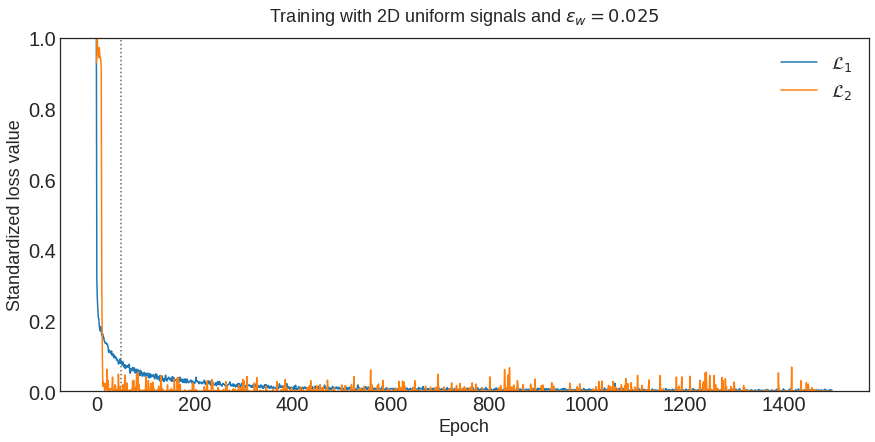

In [8]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14.5, 6.5)
plt.style.use('seaborn-white')
plt.plot((hist_train-np.min(hist_train))/(np.max(hist_train)-np.min(hist_train)), label = '$\mathcal{L}_1$')
#plt.plot(hist_val/np.max(hist_val), label = 'Validation error')
plt.plot((hist_prior-np.min(hist_prior))/(np.max(hist_prior)-np.min(hist_prior)), label = '$\mathcal{L}_2$')
plt.ylabel('Standardized loss value', fontsize = 18)
plt.xlabel('Epoch', fontsize = 18)
plt.vlines(x=50, ymin=-0.1, ymax=1, color='black',linestyles ="dotted", alpha=0.6)
plt.title('Training with 2D uniform signals and $\epsilon_w=0.025$', fontsize = 18, y = 1.03)
plt.ylim(0,1)
plt.legend(fontsize=18)